##  方案1 特征窗口：拼接前q特征
01.base_feature_info_v2.ipynb 为两个方案公用的；
11.加工衍生特征；

In [1]:

import pandas as pd 
import numpy as np

base_df = pd.read_pickle('./data/outerjoin_raw_features_label.pkl')
print(base_df.shape)
base_df.head(1)

(1697940, 89)


,cust_no,valid,I1,I2,I3,I4,I5,I6,I7,I8,...,X1,X2,X3,X4,X5,X6,X7,X8,cust_q,label
0,0x3b9acb25,NaN,女性,55.0,普通客户,0.0,NaN,0.0,0.0,巨蟹座,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,q30x3b9acb25,NaN


In [2]:
# right拼接cust q3的q4，q1  (1204373, 177)
# valid   (152892, 177)

q3q4_df = base_df[base_df.cust_q.str.contains('^q3')].merge(base_df[base_df.cust_q.str.contains('^q4')&(base_df.valid==1)],
                                                              how='right',left_on='cust_no',right_on='cust_no',suffixes=('_x','')
                                                             )
q4q1_df = base_df[base_df.cust_q.str.contains('^q4')].merge(base_df[base_df.cust_q.str.contains('^q1')&(base_df.valid==1)],
                                                              how='right',left_on='cust_no',right_on='cust_no',suffixes=('_x','')
                                                             )
# q3q0_df = base_df[base_df.cust_q.str.contains('^q3')].merge(base_df[base_df.cust_q.str.contains('^q3')&(base_df.valid==1)],
#                                                               how='right',left_on='cust_no',right_on='cust_no',suffixes=('_x','')
#                                                              )

train_df = pd.concat([q3q4_df, q4q1_df])  #,q3q0_df
# pd.set_option('display.max_columns', 200)
print(train_df.shape)
train_df.head(2)

(152892, 177)


,cust_no,valid_x,I1_x,I2_x,I3_x,I4_x,I5_x,I6_x,I7_x,I8_x,...,X1,X2,X3,X4,X5,X6,X7,X8,cust_q,label
0,0x3b9acb2b,1.0,男性,42.0,普通客户,0.0,NaN,1.0,0.0,天蝎座,...,0.0,0.0,2598.84,0.0,0.0,0.0,966050.13,0.0,q40x3b9acb2b,0.0
1,0x3b9acc6c,1.0,女性,37.0,普通客户,0.0,NaN,1.0,0.0,天秤座,...,0.0,0.0,1230.40,0.0,0.0,0.0,0.00,0.0,q40x3b9acc6c,1.0


In [3]:
import gc
gc.collect()
gc.enable()
del base_df,q3q4_df, q4q1_df


In [4]:
train_df.columns.values

array(['cust_no', 'valid_x', 'I1_x', 'I2_x', 'I3_x', 'I4_x', 'I5_x',
       'I6_x', 'I7_x', 'I8_x', 'I9_x', 'I10_x', 'I11_x', 'I12_x', 'I13_x',
       'I14_x', 'I15_x', 'I16_x', 'I17_x', 'I18_x', 'I19_x', 'I20_x',
       'E1_x', 'E2_x', 'E3_x', 'E4_x', 'E5_x', 'E6_x', 'E7_x', 'E8_x',
       'E9_x', 'E10_x', 'E11_x', 'E12_x', 'E13_x', 'E14_x', 'E15_x',
       'E16_x', 'E17_x', 'E18_x', 'B1_fir_x', 'B2_fir_x', 'B3_fir_x',
       'B4_fir_x', 'B5_fir_x', 'B1_sec_x', 'B2_sec_x', 'B3_sec_x',
       'B4_sec_x', 'B5_sec_x', 'B1_x', 'B2_x', 'B3_x', 'B4_x', 'B5_x',
       'B6_x', 'B7_x', 'C1_fir_x', 'C2_fir_x', 'C1_sec_x', 'C2_sec_x',
       'C1_x', 'C2_x', 'X1_fir_x', 'X2_fir_x', 'X3_fir_x', 'X4_fir_x',
       'X5_fir_x', 'X6_fir_x', 'X7_fir_x', 'X8_fir_x', 'X1_sec_x',
       'X2_sec_x', 'X3_sec_x', 'X4_sec_x', 'X5_sec_x', 'X6_sec_x',
       'X7_sec_x', 'X8_sec_x', 'X1_x', 'X2_x', 'X3_x', 'X4_x', 'X5_x',
       'X6_x', 'X7_x', 'X8_x', 'cust_q_x', 'label_x', 'valid', 'I1', 'I2',
       'I3', 'I4

In [5]:
 # 修改列名
train_df.columns = ['cust_no','lastq_valid', 'lastq_I1', 'lastq_I2', 'lastq_I3', 'lastq_I4', 'lastq_I5',
       'lastq_I6', 'lastq_I7', 'lastq_I8', 'lastq_I9', 'lastq_I10', 'lastq_I11', 'lastq_I12', 'lastq_I13',
       'lastq_I14', 'lastq_I15', 'lastq_I16', 'lastq_I17', 'lastq_I18', 'lastq_I19', 'lastq_I20',
       'lastq_E1', 'lastq_E2', 'lastq_E3', 'lastq_E4', 'lastq_E5', 'lastq_E6', 'lastq_E7', 'lastq_E8',
       'lastq_E9', 'lastq_E10', 'lastq_E11', 'lastq_E12', 'lastq_E13', 'lastq_E14', 'lastq_E15',
       'lastq_E16', 'lastq_E17', 'lastq_E18', 'lastq_B1_fir', 'lastq_B2_fir', 'lastq_B3_fir',
       'lastq_B4_fir', 'lastq_B5_fir', 'lastq_B1_sec', 'lastq_B2_sec', 'lastq_B3_sec',
       'lastq_B4_sec', 'lastq_B5_sec', 'lastq_B1', 'lastq_B2', 'lastq_B3', 'lastq_B4', 'lastq_B5',
       'lastq_B6', 'lastq_B7', 'lastq_C1_fir', 'lastq_C2_fir', 'lastq_C1_sec', 'lastq_C2_sec',
       'lastq_C1', 'lastq_C2', 'lastq_X1_fir', 'lastq_X2_fir', 'lastq_X3_fir', 'lastq_X4_fir',
       'lastq_X5_fir', 'lastq_X6_fir', 'lastq_X7_fir', 'lastq_X8_fir', 'lastq_X1_sec',
       'lastq_X2_sec', 'lastq_X3_sec', 'lastq_X4_sec', 'lastq_X5_sec', 'lastq_X6_sec',
       'lastq_X7_sec', 'lastq_X8_sec', 'lastq_X1', 'lastq_X2', 'lastq_X3', 'lastq_X4', 'lastq_X5',
       'lastq_X6', 'lastq_X7', 'lastq_X8', 'lastq_cust_q', 'lastq_label', 'valid', 'I1', 'I2',
       'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'I11', 'I12',
       'I13', 'I14', 'I15', 'I16', 'I17', 'I18', 'I19', 'I20', 'E1', 'E2',
       'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12',
       'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'B1_fir', 'B2_fir',
       'B3_fir', 'B4_fir', 'B5_fir', 'B1_sec', 'B2_sec', 'B3_sec',
       'B4_sec', 'B5_sec', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7',
       'C1_fir', 'C2_fir', 'C1_sec', 'C2_sec', 'C1', 'C2', 'X1_fir',
       'X2_fir', 'X3_fir', 'X4_fir', 'X5_fir', 'X6_fir', 'X7_fir',
       'X8_fir', 'X1_sec', 'X2_sec', 'X3_sec', 'X4_sec', 'X5_sec',
       'X6_sec', 'X7_sec', 'X8_sec', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6',
       'X7', 'X8', 'cust_q', 'label']
train_df.head()

,cust_no,lastq_valid,lastq_I1,lastq_I2,lastq_I3,lastq_I4,lastq_I5,lastq_I6,lastq_I7,lastq_I8,...,X1,X2,X3,X4,X5,X6,X7,X8,cust_q,label
0,0x3b9acb2b,1.0,男性,42.0,普通客户,0.0,NaN,1.0,0.0,天蝎座,...,0.0,0.00,2598.84,0.0,0.0,0.0,966050.13,0.0,q40x3b9acb2b,0.0
1,0x3b9acc6c,1.0,女性,37.0,普通客户,0.0,NaN,1.0,0.0,天秤座,...,0.0,0.00,1230.40,0.0,0.0,0.0,0.00,0.0,q40x3b9acc6c,1.0
2,0x3b9acc87,1.0,女性,68.0,黄金,0.0,不便分类的其他从业人员,0.0,0.0,双子座,...,0.0,0.00,105.93,110000.0,0.0,0.0,0.00,0.0,q40x3b9acc87,1.0
3,0x3b9acca4,1.0,女性,69.0,普通客户,0.0,服务性工作人员,0.0,0.0,处女座,...,0.0,20787.61,12520.83,0.0,0.0,0.0,0.00,0.0,q40x3b9acca4,1.0
4,0x3b9accb7,1.0,女性,49.0,普通客户,0.0,NaN,1.0,0.0,双子座,...,0.0,0.00,4159.10,0.0,0.0,0.0,0.00,0.0,q40x3b9accb7,1.0


In [6]:
# # 纯q3 的左特征去除
# lastq_list = ['lastq_valid', 'lastq_I1', 'lastq_I2', 'lastq_I3', 'lastq_I4', 'lastq_I5',
#        'lastq_I6', 'lastq_I7', 'lastq_I8', 'lastq_I9', 'lastq_I10', 'lastq_I11', 'lastq_I12', 'lastq_I13',
#        'lastq_I14', 'lastq_I15', 'lastq_I16', 'lastq_I17', 'lastq_I18', 'lastq_I19', 'lastq_I20',
#        'lastq_E1', 'lastq_E2', 'lastq_E3', 'lastq_E4', 'lastq_E5', 'lastq_E6', 'lastq_E7', 'lastq_E8',
#        'lastq_E9', 'lastq_E10', 'lastq_E11', 'lastq_E12', 'lastq_E13', 'lastq_E14', 'lastq_E15',
#        'lastq_E16', 'lastq_E17', 'lastq_E18', 'lastq_B1_fir', 'lastq_B2_fir', 'lastq_B3_fir',
#        'lastq_B4_fir', 'lastq_B5_fir', 'lastq_B1_sec', 'lastq_B2_sec', 'lastq_B3_sec',
#        'lastq_B4_sec', 'lastq_B5_sec', 'lastq_B1', 'lastq_B2', 'lastq_B3', 'lastq_B4', 'lastq_B5',
#        'lastq_B6', 'lastq_B7', 'lastq_C1_fir', 'lastq_C2_fir', 'lastq_C1_sec', 'lastq_C2_sec',
#        'lastq_C1', 'lastq_C2', 'lastq_X1_fir', 'lastq_X2_fir', 'lastq_X3_fir', 'lastq_X4_fir',
#        'lastq_X5_fir', 'lastq_X6_fir', 'lastq_X7_fir', 'lastq_X8_fir', 'lastq_X1_sec',
#        'lastq_X2_sec', 'lastq_X3_sec', 'lastq_X4_sec', 'lastq_X5_sec', 'lastq_X6_sec',
#        'lastq_X7_sec', 'lastq_X8_sec', 'lastq_X1', 'lastq_X2', 'lastq_X3', 'lastq_X4', 'lastq_X5',
#        'lastq_X6', 'lastq_X7', 'lastq_X8', 'lastq_cust_q', 'lastq_label']
# train_df.loc[train_df.cust_q.str.contains('^q3'),lastq_list] = np.nan
# train_df[train_df.cust_q.str.contains('^q3')].head()

## 特征衍生

01基础特征；02.上一季度基础特征lastq_；03.衍生；04.参考重要特征、featuretools衍生；

In [2]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [8]:
# I：基础信息模块 

# 数值型 家庭年收入， 年龄， 直接入模 
train_df['I_missrate'] = train_df.loc[:,train_df.columns.str.contains('^I')].isnull().sum(axis=1)/20
train_df['lastq_I_missrate'] = train_df.loc[:,train_df.columns.str.contains('^lastq_I')].isnull().sum(axis=1)/20

category_list = ['I1','I3','I5','I8','I10','I13','I14','lastq_I1','lastq_I3','lastq_I5','lastq_I8','lastq_I10','lastq_I13','lastq_I14']

print(train_df.loc[:,train_df.columns.str.contains('I')].isnull().sum()/train_df.shape[0])
train_df.loc[:,train_df.columns.str.contains('I')].head()

lastq_I1            0.059761
lastq_I2            0.057845
lastq_I3            0.057845
lastq_I4            0.057845
lastq_I5            0.133329
lastq_I6            0.057845
lastq_I7            0.057845
lastq_I8            0.057845
lastq_I9            1.000000
lastq_I10           0.890766
lastq_I11           0.057845
lastq_I12           0.057845
lastq_I13           0.985957
lastq_I14           0.897797
lastq_I15           0.057845
lastq_I16           0.057845
lastq_I17           0.057845
lastq_I18           0.057845
lastq_I19           0.057845
lastq_I20           0.057845
I1                  0.000419
I2                  0.000000
I3                  0.000000
I4                  0.000000
I5                  0.055425
I6                  0.000000
I7                  0.000000
I8                  0.000000
I9                  1.000000
I10                 0.882800
I11                 0.000000
I12                 0.000000
I13                 0.977265
I14                 0.890053
I15           

,lastq_I1,lastq_I2,lastq_I3,lastq_I4,lastq_I5,lastq_I6,lastq_I7,lastq_I8,lastq_I9,lastq_I10,...,I13,I14,I15,I16,I17,I18,I19,I20,I_missrate,lastq_I_missrate
0,男性,42.0,普通客户,0.0,NaN,1.0,0.0,天蝎座,NaN,NaN,...,NaN,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.20,0.25
1,女性,37.0,普通客户,0.0,NaN,1.0,0.0,天秤座,NaN,NaN,...,NaN,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.25,0.25
2,女性,68.0,黄金,0.0,不便分类的其他从业人员,0.0,0.0,双子座,NaN,NaN,...,NaN,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.20,0.20
3,女性,69.0,普通客户,0.0,服务性工作人员,0.0,0.0,处女座,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.20,0.20
4,女性,49.0,普通客户,0.0,NaN,1.0,0.0,双子座,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.25


In [9]:
# C:存款模块

# miss rate
train_df['C_missrate'] = train_df.loc[:,train_df.columns.str.contains('C')].isnull().sum(axis=1)/train_df.loc[:,train_df.columns.str.contains('C')].shape[1]
# 单个产品平均存款
train_df['C1_divide_C2_fir'] = train_df.C1_fir/train_df.C2_fir

train_df['C1_divide_C2_sec'] = train_df.C1_sec/train_df.C2_sec

train_df['C1_divide_C2'] = train_df.C1/train_df.C2

# 单个特征：存款、产品数的方差 平均值 总和  增长率
train_df['C1_var'] = np.var(train_df[['C1_fir','C1_sec','C1']].fillna(0), axis = 1) 
train_df['C2_var'] = np.var(train_df[['C2_fir','C2_sec','C2']].fillna(0), axis = 1)
train_df['C1_mean'] = np.mean(train_df[['C1_fir','C1_sec','C1']].fillna(0), axis = 1)
train_df['C2_mean'] = np.mean(train_df[['C2_fir','C2_sec','C2']].fillna(0), axis = 1)
train_df['C1_incre'] = train_df.C1 / np.mean(train_df[['C1_fir','C1_sec','C1']].fillna(0), axis = 1) - 1 #
train_df['C2_incre'] = train_df.C2 / np.mean(train_df[['C2_fir','C2_sec','C2']].fillna(0), axis = 1) - 1
train_df['C1_std1mean'] = np.std(np.log(train_df[['C1_fir','C1_sec','C1']].fillna(0)), axis = 1) + np.mean(np.log(train_df[['C1_fir','C1_sec','C1']].fillna(0)), axis = 1)
train_df['C2_std1mean'] = np.std(np.log(train_df[['C2_fir','C2_sec','C2']].fillna(0)), axis = 1) + np.mean(np.log(train_df[['C2_fir','C2_sec','C2']].fillna(0)), axis = 1)
train_df['C1_sum_divide_C2_sum'] = np.sum(train_df[['C1_fir','C1_sec','C1']].fillna(0), axis = 1) / np.sum(train_df[['C2_fir','C2_sec','C2']].fillna(0), axis = 1)

train_df['C1_incre_v2'] = train_df.C1 / np.mean(train_df[['C1_fir','C1_sec']].fillna(0), axis = 1) - 1 
train_df['C2_incre_v2'] = train_df.C2 / np.mean(train_df[['C2_fir','C2_sec']].fillna(0), axis = 1) - 1

train_df['C1_incre_v3'] = train_df.C1 / train_df.C1_sec - 1 
train_df['C2_incre_v3'] = train_df.C2 / train_df.C2_sec - 1

train_df['C1_incre_v4'] = train_df.C1_sec / train_df.C1_fir - 1 
train_df['C2_incre_v4'] = train_df.C2_sec / train_df.C2_fir - 1

train_df['C1_incre_mean'] = np.mean(train_df[['C1_incre_v3','C1_incre_v4']].fillna(0), axis = 1)
train_df['C2_incre_mean'] = np.mean(train_df[['C2_incre_v3','C2_incre_v4']].fillna(0), axis = 1)

#------lastq
# lastq_C:存款模块

# 单个产品平均存款
train_df['lastq_C1_divide_lastq_C2_fir'] = train_df.lastq_C1_fir/train_df.lastq_C2_fir

train_df['lastq_C1_divide_lastq_C2_sec'] = train_df.lastq_C1_sec/train_df.lastq_C2_sec

train_df['lastq_C1_divide_lastq_C2'] = train_df.lastq_C1/train_df.lastq_C2

# 单个特征：存款、产品数的方差 平均值 总和  增长率
train_df['lastq_C1_var'] = np.var(train_df[['lastq_C1_fir','lastq_C1_sec','lastq_C1']].fillna(0), axis = 1) #
train_df['lastq_C2_var'] = np.var(train_df[['lastq_C2_fir','lastq_C2_sec','lastq_C2']].fillna(0), axis = 1)
train_df['lastq_C1_mean'] = np.mean(train_df[['lastq_C1_fir','lastq_C1_sec','lastq_C1']].fillna(0), axis = 1)
train_df['lastq_C2_mean'] = np.mean(train_df[['lastq_C2_fir','lastq_C2_sec','lastq_C2']].fillna(0), axis = 1)
train_df['lastq_C1_incre'] = train_df.lastq_C1 / np.mean(train_df[['lastq_C1_fir','lastq_C1_sec','lastq_C1']].fillna(0), axis = 1) - 1 #
train_df['lastq_C2_incre'] = train_df.lastq_C2 / np.mean(train_df[['lastq_C2_fir','lastq_C2_sec','lastq_C2']].fillna(0), axis = 1) - 1
train_df['lastq_C1_std1mean'] = np.std(np.log(train_df[['lastq_C1_fir','lastq_C1_sec','lastq_C1']].fillna(0)), axis = 1) + np.mean(np.log(train_df[['lastq_C1_fir','lastq_C1_sec','lastq_C1']].fillna(0)), axis = 1)
train_df['lastq_C2_std1mean'] = np.std(np.log(train_df[['lastq_C2_fir','lastq_C2_sec','lastq_C2']].fillna(0)), axis = 1) + np.mean(np.log(train_df[['lastq_C2_fir','lastq_C2_sec','lastq_C2']].fillna(0)), axis = 1)
train_df['lastq_C1_sum_divide_lastq_C2_sum'] = np.sum(train_df[['lastq_C1_fir','lastq_C1_sec','lastq_C1']].fillna(0), axis = 1) / np.sum(train_df[['lastq_C2_fir','lastq_C2_sec','lastq_C2']].fillna(0), axis = 1)

train_df['lastq_C1_incre_v2'] = train_df.lastq_C1 / np.mean(train_df[['lastq_C1_fir','lastq_C1_sec']].fillna(0), axis = 1) - 1 
train_df['lastq_C2_incre_v2'] = train_df.lastq_C2 / np.mean(train_df[['lastq_C2_fir','lastq_C2_sec']].fillna(0), axis = 1) - 1

train_df['lastq_C1_incre_v3'] = train_df.lastq_C1 / train_df.lastq_C1_sec - 1 
train_df['lastq_C2_incre_v3'] = train_df.lastq_C2 / train_df.lastq_C2_sec - 1

train_df['lastq_C1_incre_v4'] = train_df.lastq_C1_sec / train_df.lastq_C1_fir - 1 
train_df['lastq_C2_incre_v4'] = train_df.lastq_C2_sec / train_df.lastq_C2_fir - 1

train_df['lastq_C1_incre_mean'] = np.mean(train_df[['lastq_C1_incre_v3','lastq_C1_incre_v4']].fillna(0), axis = 1)
train_df['lastq_C2_incre_mean'] = np.mean(train_df[['lastq_C2_incre_v3','lastq_C2_incre_v4']].fillna(0), axis = 1)


#------ lastq & q
train_df['C1_qq_max'] = np.max(train_df[['C1_fir','C1_sec','C1','lastq_C1_fir','lastq_C1_sec','lastq_C1']].fillna(0), axis = 1) 
train_df['C2_qq_max'] = np.max(train_df[['C2_fir','C2_sec','C2','lastq_C2_fir','lastq_C2_sec','lastq_C2']].fillna(0), axis = 1)
train_df['C1_qq_min'] = np.min(train_df[['C1_fir','C1_sec','C1','lastq_C1_fir','lastq_C1_sec','lastq_C1']].fillna(0), axis = 1)
train_df['C2_qq_min'] = np.min(train_df[['C2_fir','C2_sec','C2','lastq_C2_fir','lastq_C2_sec','lastq_C2']].fillna(0), axis = 1)
train_df['C1_qq_var'] = np.var(train_df[['C1_fir','C1_sec','C1','lastq_C1_fir','lastq_C1_sec','lastq_C1']].fillna(0), axis = 1) 
train_df['C2_qq_var'] = np.var(train_df[['C2_fir','C2_sec','C2','lastq_C2_fir','lastq_C2_sec','lastq_C2']].fillna(0), axis = 1)
train_df['C1_qq_median'] = np.median(train_df[['C1_fir','C1_sec','C1','lastq_C1_fir','lastq_C1_sec','lastq_C1']].fillna(0), axis = 1)
train_df['C2_qq_median'] = np.median(train_df[['C2_fir','C2_sec','C2','lastq_C2_fir','lastq_C2_sec','lastq_C2']].fillna(0), axis = 1)
train_df['C1_qq_mean'] = np.mean(train_df[['C1_fir','C1_sec','C1','lastq_C1_fir','lastq_C1_sec','lastq_C1']].fillna(0), axis = 1)
train_df['C2_qq_mean'] = np.mean(train_df[['C2_fir','C2_sec','C2','lastq_C2_fir','lastq_C2_sec','lastq_C2']].fillna(0), axis = 1)
train_df['C1_qq_incre'] = train_df.C1 / np.mean(train_df[['C1_fir','C1_sec','C1','lastq_C1_fir','lastq_C1_sec','lastq_C1']].fillna(0), axis = 1) - 1 #
train_df['C2_qq_incre'] = train_df.C2 / np.mean(train_df[['C2_fir','C2_sec','C2','lastq_C2_fir','lastq_C2_sec','lastq_C2']].fillna(0), axis = 1) - 1
train_df['C1_qq_std1mean'] = np.std(np.log(train_df[['C1_fir','C1_sec','C1','lastq_C1_fir','lastq_C1_sec','lastq_C1']].fillna(0)), axis = 1) + np.mean(np.log(train_df[['C1_fir','C1_sec','C1','lastq_C1_fir','lastq_C1_sec','lastq_C1']].fillna(0)), axis = 1)
train_df['C2_qq_std1mean'] = np.std(np.log(train_df[['C2_fir','C2_sec','C2','lastq_C2_fir','lastq_C2_sec','lastq_C2']].fillna(0)), axis = 1) + np.mean(np.log(train_df[['C2_fir','C2_sec','C2','lastq_C2_fir','lastq_C2_sec','lastq_C2']].fillna(0)), axis = 1)

train_df['C2_qq_mean_ratio'] = train_df['C2_mean']/train_df['lastq_C2_mean']
train_df['C1_qq_mean_ratio'] = train_df['C1_mean']/train_df['lastq_C1_mean']
train_df['C2_qq_incre_ratio'] = train_df['C2_incre']-train_df['lastq_C2_incre']
train_df['C1_qq_incre_ratio'] = train_df['C1_incre']-train_df['lastq_C1_incre']

train_df['C1_qq_std1mean2'] = -np.std(np.log(train_df[['C1_fir','C1_sec','C1','lastq_C1_fir','lastq_C1_sec','lastq_C1']].fillna(0)), axis = 1) + np.mean(np.log(train_df[['C1_fir','C1_sec','C1','lastq_C1_fir','lastq_C1_sec','lastq_C1']].fillna(0)), axis = 1)
train_df['C2_qq_std1mean2'] = -np.std(np.log(train_df[['C2_fir','C2_sec','C2','lastq_C2_fir','lastq_C2_sec','lastq_C2']].fillna(0)), axis = 1) + np.mean(np.log(train_df[['C2_fir','C2_sec','C2','lastq_C2_fir','lastq_C2_sec','lastq_C2']].fillna(0)), axis = 1)


train_df.loc[:,train_df.columns.str.contains('C')].head()


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:90: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:91: RuntimeWarning: divide by zero encountered in log


,lastq_C1_fir,lastq_C2_fir,lastq_C1_sec,lastq_C2_sec,lastq_C1,lastq_C2,C1_fir,C2_fir,C1_sec,C2_sec,...,C1_qq_incre,C2_qq_incre,C1_qq_std1mean,C2_qq_std1mean,C2_qq_mean_ratio,C1_qq_mean_ratio,C2_qq_incre_ratio,C1_qq_incre_ratio,C1_qq_std1mean2,C2_qq_std1mean2
0,4757.48,3.0,3957.83,3.0,2620.49,3.0,5164.24,3.0,4010.83,3.0,...,-0.268408,0.0,8.485526,1.098612,1.000000,1.060648,0.0,0.017168,7.988726,1.098612
1,1228.03,2.0,1228.03,2.0,1229.22,2.0,1229.22,2.0,1229.22,2.0,...,0.001123,0.0,7.114635,0.693147,1.000000,1.000966,0.0,-0.000006,7.113309,0.693147
2,100009.58,3.0,100009.58,3.0,100009.58,3.0,60.69,2.0,60.69,2.0,...,-0.998649,-0.2,11.513197,1.098612,0.666667,0.000630,0.0,0.073333,4.141644,0.693147
3,32429.52,4.0,32429.52,4.0,32440.72,4.0,32440.72,4.0,32440.72,4.0,...,0.000400,0.0,10.387348,1.386294,1.000000,1.000344,0.0,-0.000002,10.386875,1.386294
4,4151.08,1.0,4151.08,1.0,4155.11,1.0,4155.11,1.0,4155.11,1.0,...,0.001124,0.0,8.332595,0.000000,1.000000,1.000967,0.0,-0.000007,8.331267,0.000000


In [10]:
# X：AUM

#miss rate
train_df['X_missrate'] = train_df.loc[:,train_df.columns.str.contains('X')].isnull().sum(axis=1)/train_df.loc[:,train_df.columns.str.contains('X')].shape[1]

### all 
train_df['X_qqall_sum'] = np.sum(train_df.loc[:,train_df.columns.str.contains('X')].fillna(0), axis = 1)
train_df['X_qqall_var'] = np.var(train_df.loc[:,train_df.columns.str.contains('X')].fillna(0), axis = 1)
train_df['X_qqall_max'] = np.max(train_df.loc[:,train_df.columns.str.contains('X')].fillna(0), axis = 1)
train_df['X_qqall_min'] = np.min(train_df.loc[:,train_df.columns.str.contains('X')].fillna(0), axis = 1)
train_df['X_qqall_median'] = np.median(train_df.loc[:,train_df.columns.str.contains('X')].fillna(0), axis = 1)
train_df['X1_all_ratio'] = np.sum(train_df.loc[:,train_df.columns.str.contains('X1')].fillna(0), axis = 1) / train_df['X_qqall_sum']
train_df['X2_dingall_ratio'] = np.sum(train_df.loc[:,train_df.columns.str.contains('X2')].fillna(0), axis = 1) / train_df['X_qqall_sum']
train_df['X_dinghuoall_ratio'] = np.sum(train_df.loc[:,train_df.columns.str.contains('X2')].fillna(0), axis = 1) / np.sum(train_df.loc[:,train_df.columns.str.contains('X3')].fillna(0), axis = 1)
train_df['X3_all_ratio'] = np.sum(train_df.loc[:,train_df.columns.str.contains('X3')].fillna(0), axis = 1) / train_df['X_qqall_sum']
train_df['X4_all_ratio'] = np.sum(train_df.loc[:,train_df.columns.str.contains('X4')].fillna(0), axis = 1) / train_df['X_qqall_sum']
train_df['X5_all_ratio'] = np.sum(train_df.loc[:,train_df.columns.str.contains('X5')].fillna(0), axis = 1) / train_df['X_qqall_sum']
train_df['X6_all_ratio'] = np.sum(train_df.loc[:,train_df.columns.str.contains('X6')].fillna(0), axis = 1) / train_df['X_qqall_sum']
train_df['X7_daiall_ratio'] = np.sum(train_df.loc[:,train_df.columns.str.contains('X7')].fillna(0), axis = 1) / train_df['X_qqall_sum']
train_df['X8_all_ratio'] = np.sum(train_df.loc[:,train_df.columns.str.contains('X8')].fillna(0), axis = 1) / train_df['X_qqall_sum']
train_df['X_touall_ratio'] = np.sum(train_df[['X4_all_ratio','X5_all_ratio','X6_all_ratio']].fillna(0), axis = 1) 
train_df['X_cunall_ratio'] = np.sum(train_df[['X1_all_ratio','X2_dingall_ratio','X3_all_ratio','X8_all_ratio']].fillna(0), axis = 1)


# 单特征 方差 平均值 增长率
train_df['X1_var'] = np.var(train_df[['X1_fir','X1_sec','X1']].fillna(0), axis = 1) #
train_df['X1_mean'] = np.mean(train_df[['X1_fir','X1_sec','X1']].fillna(0), axis = 1)
train_df['X1_incre'] = train_df.X1 / np.mean(train_df[['X1_fir','X1_sec','X1']].fillna(0), axis = 1) - 1 #
train_df['X1_std1mean'] = np.std(np.log(train_df[['X1_fir','X1_sec','X1']].fillna(0)), axis = 1) + np.mean(np.log(train_df[['X1_fir','X1_sec','X1']].fillna(0)), axis = 1)
train_df['X1_std1mean2'] = - np.std(np.log(train_df[['X1_fir','X1_sec','X1']].fillna(0)), axis = 1) + np.mean(np.log(train_df[['X1_fir','X1_sec','X1']].fillna(0)), axis = 1)

train_df['X2_var'] = np.var(train_df[['X2_fir','X2_sec','X2']].fillna(0), axis = 1) #
train_df['X2_mean'] = np.mean(train_df[['X2_fir','X2_sec','X2']].fillna(0), axis = 1)
train_df['X2_incre'] = train_df.X2 / np.mean(train_df[['X2_fir','X2_sec','X2']].fillna(0), axis = 1) - 1 #

train_df['X3_var'] = np.var(train_df[['X3_fir','X3_sec','X3']].fillna(0), axis = 1) #
train_df['X3_mean'] = np.mean(train_df[['X3_fir','X3_sec','X3']].fillna(0), axis = 1)
train_df['X3_incre'] = train_df.X3 / np.mean(train_df[['X3_fir','X3_sec','X3']].fillna(0), axis = 1) - 1 #
train_df['X3_std1mean'] = np.std(np.log(train_df[['X3_fir','X3_sec','X3']].fillna(0)), axis = 1) + np.mean(np.log(train_df[['X3_fir','X3_sec','X3']].fillna(0)), axis = 1)
train_df['X3_std1mean2'] = -np.std(np.log(train_df[['X3_fir','X3_sec','X3']].fillna(0)), axis = 1) + np.mean(np.log(train_df[['X3_fir','X3_sec','X3']].fillna(0)), axis = 1)

train_df['X4_var'] = np.var(train_df[['X4_fir','X4_sec','X4']].fillna(0), axis = 1) #
train_df['X4_mean'] = np.mean(train_df[['X4_fir','X4_sec','X4']].fillna(0), axis = 1)
train_df['X4_incre'] = train_df.X4 / np.mean(train_df[['X4_fir','X4_sec','X4']].fillna(0), axis = 1) - 1 #

train_df['X5_var'] = np.var(train_df[['X5_fir','X5_sec','X5']].fillna(0), axis = 1) #
train_df['X5_mean'] = np.mean(train_df[['X5_fir','X5_sec','X5']].fillna(0), axis = 1)
train_df['X5_incre'] = train_df.X5 / np.mean(train_df[['X5_fir','X5_sec','X5']].fillna(0), axis = 1) - 1 #

train_df['X6_var'] = np.var(train_df[['X6_fir','X6_sec','X6']].fillna(0), axis = 1) #
train_df['X6_mean'] = np.mean(train_df[['X6_fir','X6_sec','X6']].fillna(0), axis = 1)
train_df['X6_incre'] = train_df.X6 / np.mean(train_df[['X6_fir','X6_sec','X6']].fillna(0), axis = 1) - 1 #

train_df['X7_var'] = np.var(train_df[['X7_fir','X7_sec','X7']].fillna(0), axis = 1) #
train_df['X7_mean'] = np.mean(train_df[['X7_fir','X7_sec','X7']].fillna(0), axis = 1)
train_df['X7_incre'] = train_df.X7 / np.mean(train_df[['X7_fir','X7_sec','X7']].fillna(0), axis = 1) - 1 #

train_df['X8_var'] = np.var(train_df[['X8_fir','X8_sec','X8']].fillna(0), axis = 1) #
train_df['X8_mean'] = np.mean(train_df[['X8_fir','X8_sec','X8']].fillna(0), axis = 1)
train_df['X8_incre'] = train_df.X8 / np.mean(train_df[['X8_fir','X8_sec','X8']].fillna(0), axis = 1) - 1 #

# 同期定活比，投资比， 总aum， 贷款占比
train_df['X_fir_sum'] = np.sum(train_df[['X1_fir','X2_fir','X3_fir','X4_fir','X5_fir','X6_fir','X7_fir','X8_fir']].fillna(0), axis = 1)
train_df['X_fir_ding_ratio'] = train_df.X2_fir / train_df['X_fir_sum']
train_df['X_fir_dinghuo_ratio'] = train_df.X2_fir / train_df.X3_fir
train_df['X_fir_tou_ratio'] = np.sum(train_df[['X4_fir','X5_fir','X6_fir']].fillna(0), axis = 1) / train_df['X_fir_sum']
train_df['X_fir_cun_ratio'] = np.sum(train_df[['X1_fir','X2_fir','X3_fir','X8_fir']].fillna(0), axis = 1) / train_df['X_fir_sum']
train_df['X_fir_dai_ratio'] = train_df.X7_fir / train_df['X_fir_sum']
train_df['X_fir_var'] = np.var(train_df[['X1_fir','X2_fir','X3_fir','X4_fir','X5_fir','X6_fir','X7_fir','X8_fir']].fillna(0), axis = 1)

train_df['X_sec_sum'] = np.sum(train_df[['X1_sec','X2_sec','X3_sec','X4_sec','X5_sec','X6_sec','X7_sec','X8_sec']].fillna(0), axis = 1)
train_df['X_sec_ding_ratio'] = train_df.X2_sec / train_df['X_sec_sum']
train_df['X_sec_dinghuo_ratio'] = train_df.X2_sec / train_df.X3_sec
train_df['X_sec_tou_ratio'] = np.sum(train_df[['X4_sec','X5_sec','X6_sec']].fillna(0), axis = 1) / train_df['X_sec_sum']
train_df['X_sec_cun_ratio'] = np.sum(train_df[['X1_sec','X2_sec','X3_sec','X8_sec']].fillna(0), axis = 1) / train_df['X_sec_sum']
train_df['X_sec_dai_ratio'] = train_df.X7_sec / train_df['X_sec_sum']
train_df['X_sec_var'] = np.var(train_df[['X1_sec','X2_sec','X3_sec','X4_sec','X5_sec','X6_sec','X7_sec','X8_sec']].fillna(0), axis = 1)

train_df['X_sum'] = np.sum(train_df[['X1','X2','X3','X4','X5','X6','X7','X8']].fillna(0), axis = 1)
train_df['X_ding_ratio'] = train_df.X2 / train_df['X_sum']
train_df['X_dinghuo_ratio'] = train_df.X2 / train_df.X3
train_df['X_tou_ratio'] = np.sum(train_df[['X4','X5','X6']].fillna(0), axis = 1) / train_df['X_sum']
train_df['X_cun_ratio'] = np.sum(train_df[['X1','X2','X3','X8']].fillna(0), axis = 1) / train_df['X_sum']
train_df['X_dai_ratio'] = train_df.X7 / train_df['X_sum']
train_df['X_var'] = np.var(train_df[['X1','X2','X3','X4','X5','X6','X7','X8']].fillna(0), axis = 1)

# incre 
train_df['X1_incre_v2'] = train_df.X1 / np.mean(train_df[['X1_fir','X1_sec']].fillna(0), axis = 1) - 1 
train_df['X1_incre_v3'] = train_df.X1 / train_df.X1_sec - 1 
train_df['X1_incre_v4'] = train_df.X1_sec / train_df.X1_fir - 1 
train_df['X1_incre_mean'] = np.mean(train_df[['X1_incre_v3','X1_incre_v4']].fillna(0), axis = 1)

train_df['X2_incre_v2'] = train_df.X2 / np.mean(train_df[['X2_fir','X2_sec']].fillna(0), axis = 1) - 1 
train_df['X2_incre_v3'] = train_df.X2 / train_df.X2_sec - 1 
train_df['X2_incre_v4'] = train_df.X2_sec / train_df.X2_fir - 1 
train_df['X2_incre_mean'] = np.mean(train_df[['X2_incre_v3','X2_incre_v4']].fillna(0), axis = 1)

train_df['X3_incre_v2'] = train_df.X3 / np.mean(train_df[['X3_fir','X3_sec']].fillna(0), axis = 1) - 1 
train_df['X3_incre_v3'] = train_df.X3 / train_df.X3_sec - 1 
train_df['X3_incre_v4'] = train_df.X3_sec / train_df.X3_fir - 1 
train_df['X3_incre_mean'] = np.mean(train_df[['X3_incre_v3','X3_incre_v4']].fillna(0), axis = 1)

train_df['X4_incre_v2'] = train_df.X4 / np.mean(train_df[['X4_fir','X4_sec']].fillna(0), axis = 1) - 1 
train_df['X4_incre_v3'] = train_df.X4 / train_df.X4_sec - 1 
train_df['X4_incre_v4'] = train_df.X4_sec / train_df.X4_fir - 1 
train_df['X4_incre_mean'] = np.mean(train_df[['X4_incre_v3','X4_incre_v4']].fillna(0), axis = 1)

train_df['X5_incre_v2'] = train_df.X5 / np.mean(train_df[['X5_fir','X5_sec']].fillna(0), axis = 1) - 1 
train_df['X5_incre_v3'] = train_df.X5 / train_df.X5_sec - 1 
train_df['X5_incre_v4'] = train_df.X5_sec / train_df.X5_fir - 1 
train_df['X5_incre_mean'] = np.mean(train_df[['X5_incre_v3','X5_incre_v4']].fillna(0), axis = 1)

train_df['X6_incre_v2'] = train_df.X6 / np.mean(train_df[['X6_fir','X6_sec']].fillna(0), axis = 1) - 1 
train_df['X6_incre_v3'] = train_df.X6 / train_df.X6_sec - 1 
train_df['X6_incre_v4'] = train_df.X6_sec / train_df.X6_fir - 1 
train_df['X6_incre_mean'] = np.mean(train_df[['X6_incre_v3','X6_incre_v4']].fillna(0), axis = 1)

train_df['X7_incre_v2'] = train_df.X7 / np.mean(train_df[['X7_fir','X7_sec']].fillna(0), axis = 1) - 1 
train_df['X7_incre_v3'] = train_df.X7 / train_df.X7_sec - 1 
train_df['X7_incre_v4'] = train_df.X7_sec / train_df.X7_fir - 1 
train_df['X7_incre_mean'] = np.mean(train_df[['X7_incre_v3','X7_incre_v4']].fillna(0), axis = 1)

train_df['X8_incre_v2'] = train_df.X8 / np.mean(train_df[['X8_fir','X8_sec']].fillna(0), axis = 1) - 1 
train_df['X8_incre_v3'] = train_df.X8 / train_df.X8_sec - 1 
train_df['X8_incre_v4'] = train_df.X8_sec / train_df.X8_fir - 1 
train_df['X8_incre_mean'] = np.mean(train_df[['X8_incre_v3','X8_incre_v4']].fillna(0), axis = 1)


train_df['X_fir_tou_sum'] = np.sum(train_df[['X4_fir','X5_fir','X6_fir']].fillna(0), axis = 1)
train_df['X_fir_cun_sum'] = np.sum(train_df[['X1_fir','X2_fir','X3_fir','X8_fir']].fillna(0), axis = 1)

train_df['X_sec_tou_sum'] = np.sum(train_df[['X4_sec','X5_sec','X6_sec']].fillna(0), axis = 1)
train_df['X_sec_cun_sum'] = np.sum(train_df[['X1_sec','X2_sec','X3_sec','X8_sec']].fillna(0), axis = 1)

train_df['X_tou_sum'] = np.sum(train_df[['X4','X5','X6']].fillna(0), axis = 1)
train_df['X_cun_sum'] = np.sum(train_df[['X1','X2','X3','X8']].fillna(0), axis = 1)

train_df['X_tou_incre'] = train_df.X_tou_sum / np.mean(train_df[['X_fir_tou_sum','X_sec_tou_sum']].fillna(0), axis = 1) - 1 
train_df['X_tou_incre_v3'] = train_df.X_tou_sum / train_df.X_sec_tou_sum - 1 
train_df['X_tou_incre_v4'] = train_df.X_sec_tou_sum / train_df.X_fir_tou_sum - 1 
train_df['X_tou_incre_mean'] = np.mean(train_df[['X_tou_incre_v3','X_tou_incre_v4']].fillna(0), axis = 1)

train_df['X_cun_incre'] = train_df.X_cun_sum / np.mean(train_df[['X_fir_cun_sum','X_sec_cun_sum']].fillna(0), axis = 1) - 1 
train_df['X_cun_incre_v3'] = train_df.X_cun_sum / train_df.X_sec_cun_sum - 1 
train_df['X_cun_incre_v4'] = train_df.X_sec_cun_sum / train_df.X_fir_cun_sum - 1 
train_df['X_cun_incre_mean'] = np.mean(train_df[['X_cun_incre_v3','X_cun_incre_v4']].fillna(0), axis = 1)

#-----------lastq

# 单特征 方差 平均值 增长率
train_df['lastq_X1_var'] = np.var(train_df[['lastq_X1_fir','lastq_X1_sec','lastq_X1']].fillna(0), axis = 1) #
train_df['lastq_X1_mean'] = np.mean(train_df[['lastq_X1_fir','lastq_X1_sec','lastq_X1']].fillna(0), axis = 1)
train_df['lastq_X1_incre'] = train_df.lastq_X1 / np.mean(train_df[['lastq_X1_fir','lastq_X1_sec','lastq_X1']].fillna(0), axis = 1) - 1 #
train_df['lastq_X1_std1mean'] = np.std(np.log(train_df[['lastq_X1_fir','lastq_X1_sec','lastq_X1']].fillna(0)), axis = 1) + np.mean(np.log(train_df[['lastq_X1_fir','lastq_X1_sec','lastq_X1']].fillna(0)), axis = 1)
train_df['lastq_X1_std1mean2'] = -np.std(np.log(train_df[['lastq_X1_fir','lastq_X1_sec','lastq_X1']].fillna(0)), axis = 1) + np.mean(np.log(train_df[['lastq_X1_fir','lastq_X1_sec','lastq_X1']].fillna(0)), axis = 1)


train_df['lastq_X2_var'] = np.var(train_df[['lastq_X2_fir','lastq_X2_sec','lastq_X2']].fillna(0), axis = 1) #
train_df['lastq_X2_mean'] = np.mean(train_df[['lastq_X2_fir','lastq_X2_sec','lastq_X2']].fillna(0), axis = 1)
train_df['lastq_X2_incre'] = train_df.lastq_X2 / np.mean(train_df[['lastq_X2_fir','lastq_X2_sec','lastq_X2']].fillna(0), axis = 1) - 1 #

train_df['lastq_X3_var'] = np.var(train_df[['lastq_X3_fir','lastq_X3_sec','lastq_X3']].fillna(0), axis = 1) #
train_df['lastq_X3_mean'] = np.mean(train_df[['lastq_X3_fir','lastq_X3_sec','lastq_X3']].fillna(0), axis = 1)
train_df['lastq_X3_incre'] = train_df.lastq_X3 / np.mean(train_df[['lastq_X3_fir','lastq_X3_sec','lastq_X3']].fillna(0), axis = 1) - 1 #
train_df['lastq_X3_std1mean'] = np.std(np.log(train_df[['lastq_X3_fir','lastq_X3_sec','lastq_X3']].fillna(0)), axis = 1) + np.mean(np.log(train_df[['lastq_X3_fir','lastq_X3_sec','lastq_X3']].fillna(0)), axis = 1)
train_df['lastq_X3_std1mean2'] = -np.std(np.log(train_df[['lastq_X3_fir','lastq_X3_sec','lastq_X3']].fillna(0)), axis = 1) + np.mean(np.log(train_df[['lastq_X3_fir','lastq_X3_sec','lastq_X3']].fillna(0)), axis = 1)

train_df['lastq_X4_var'] = np.var(train_df[['lastq_X4_fir','lastq_X4_sec','lastq_X4']].fillna(0), axis = 1) #
train_df['lastq_X4_mean'] = np.mean(train_df[['lastq_X4_fir','lastq_X4_sec','lastq_X4']].fillna(0), axis = 1)
train_df['lastq_X4_incre'] = train_df.lastq_X4 / np.mean(train_df[['lastq_X4_fir','lastq_X4_sec','lastq_X4']].fillna(0), axis = 1) - 1 #

train_df['lastq_X5_var'] = np.var(train_df[['lastq_X5_fir','lastq_X5_sec','lastq_X5']].fillna(0), axis = 1) #
train_df['lastq_X5_mean'] = np.mean(train_df[['lastq_X5_fir','lastq_X5_sec','lastq_X5']].fillna(0), axis = 1)
train_df['lastq_X5_incre'] = train_df.lastq_X5 / np.mean(train_df[['lastq_X5_fir','lastq_X5_sec','lastq_X5']].fillna(0), axis = 1) - 1 #

train_df['lastq_X6_var'] = np.var(train_df[['lastq_X6_fir','lastq_X6_sec','lastq_X6']].fillna(0), axis = 1) #
train_df['lastq_X6_mean'] = np.mean(train_df[['lastq_X6_fir','lastq_X6_sec','lastq_X6']].fillna(0), axis = 1)
train_df['lastq_X6_incre'] = train_df.lastq_X6 / np.mean(train_df[['lastq_X6_fir','lastq_X6_sec','lastq_X6']].fillna(0), axis = 1) - 1 #

train_df['lastq_X7_var'] = np.var(train_df[['lastq_X7_fir','lastq_X7_sec','lastq_X7']].fillna(0), axis = 1) #
train_df['lastq_X7_mean'] = np.mean(train_df[['lastq_X7_fir','lastq_X7_sec','lastq_X7']].fillna(0), axis = 1)
train_df['lastq_X7_incre'] = train_df.lastq_X7 / np.mean(train_df[['lastq_X7_fir','lastq_X7_sec','lastq_X7']].fillna(0), axis = 1) - 1 #

train_df['lastq_X8_var'] = np.var(train_df[['lastq_X8_fir','lastq_X8_sec','lastq_X8']].fillna(0), axis = 1) #
train_df['lastq_X8_mean'] = np.mean(train_df[['lastq_X8_fir','lastq_X8_sec','lastq_X8']].fillna(0), axis = 1)
train_df['lastq_X8_incre'] = train_df.lastq_X8 / np.mean(train_df[['lastq_X8_fir','lastq_X8_sec','lastq_X8']].fillna(0), axis = 1) - 1 #
# 同期定活比，投资比， 总aum， 贷款占比
train_df['lastq_X_fir_sum'] = np.sum(train_df[['lastq_X1_fir','lastq_X2_fir','lastq_X3_fir','lastq_X4_fir','lastq_X5_fir','lastq_X6_fir','lastq_X7_fir','lastq_X8_fir']].fillna(0), axis = 1)
train_df['lastq_X_fir_ding_ratio'] = train_df.lastq_X2_fir / train_df['lastq_X_fir_sum']
train_df['lastq_X_fir_dinghuo_ratio'] = train_df.lastq_X2_fir / train_df.lastq_X3_fir
train_df['lastq_X_fir_tou_ratio'] = np.sum(train_df[['lastq_X4_fir','lastq_X5_fir','lastq_X6_fir']].fillna(0), axis = 1) / train_df['lastq_X_fir_sum']
train_df['lastq_X_fir_cun_ratio'] = np.sum(train_df[['lastq_X1_fir','lastq_X2_fir','lastq_X3_fir','lastq_X8_fir']].fillna(0), axis = 1) / train_df['lastq_X_fir_sum']
train_df['lastq_X_fir_dai_ratio'] = train_df.lastq_X7_fir / train_df['lastq_X_fir_sum']
train_df['lastq_X_fir_var'] = np.var(train_df[['lastq_X1_fir','lastq_X2_fir','lastq_X3_fir','lastq_X4_fir','lastq_X5_fir','lastq_X6_fir','lastq_X7_fir','lastq_X8_fir']].fillna(0), axis = 1)

train_df['lastq_X_sec_sum'] = np.sum(train_df[['lastq_X1_sec','lastq_X2_sec','lastq_X3_sec','lastq_X4_sec','lastq_X5_sec','lastq_X6_sec','lastq_X7_sec','lastq_X8_sec']].fillna(0), axis = 1)
train_df['lastq_X_sec_ding_ratio'] = train_df.lastq_X2_sec / train_df['lastq_X_sec_sum']
train_df['lastq_X_sec_dinghuo_ratio'] = train_df.lastq_X2_sec / train_df.lastq_X3_sec
train_df['lastq_X_sec_tou_ratio'] = np.sum(train_df[['lastq_X4_sec','lastq_X5_sec','lastq_X6_sec']].fillna(0), axis = 1) / train_df['lastq_X_sec_sum']
train_df['lastq_X_sec_cun_ratio'] = np.sum(train_df[['lastq_X1_sec','lastq_X2_sec','lastq_X3_sec','lastq_X8_sec']].fillna(0), axis = 1) / train_df['lastq_X_sec_sum']
train_df['lastq_X_sec_dai_ratio'] = train_df.lastq_X7_sec / train_df['lastq_X_sec_sum']
train_df['lastq_X_sec_var'] = np.var(train_df[['lastq_X1_sec','lastq_X2_sec','lastq_X3_sec','lastq_X4_sec','lastq_X5_sec','lastq_X6_sec','lastq_X7_sec','lastq_X8_sec']].fillna(0), axis = 1)

train_df['lastq_X_sum'] = np.sum(train_df[['lastq_X1','lastq_X2','lastq_X3','lastq_X4','lastq_X5','lastq_X6','lastq_X7','lastq_X8']].fillna(0), axis = 1)
train_df['lastq_X_ding_ratio'] = train_df.lastq_X2 / train_df['lastq_X_sum']
train_df['lastq_X_dinghuo_ratio'] = train_df.lastq_X2 / train_df.lastq_X3
train_df['lastq_X_tou_ratio'] = np.sum(train_df[['lastq_X4','lastq_X5','lastq_X6']].fillna(0), axis = 1) / train_df['lastq_X_sum']
train_df['lastq_X_cun_ratio'] = np.sum(train_df[['lastq_X1','lastq_X2','lastq_X3','lastq_X8']].fillna(0), axis = 1) / train_df['lastq_X_sum']
train_df['lastq_X_dai_ratio'] = train_df.lastq_X7 / train_df['lastq_X_sum']
train_df['lastq_X_var'] = np.var(train_df[['lastq_X1','lastq_X2','lastq_X3','lastq_X4','lastq_X5','lastq_X6','lastq_X7','lastq_X8']].fillna(0), axis = 1)


train_df['lastq_X1_incre_v2'] = train_df.lastq_X1 / np.mean(train_df[['lastq_X1_fir','lastq_X1_sec']].fillna(0), axis = 1) - 1 
train_df['lastq_X1_incre_v3'] = train_df.lastq_X1 / train_df.lastq_X1_sec - 1 
train_df['lastq_X1_incre_v4'] = train_df.lastq_X1_sec / train_df.lastq_X1_fir - 1 
train_df['lastq_X1_incre_mean'] = np.mean(train_df[['lastq_X1_incre_v3','lastq_X1_incre_v4']].fillna(0), axis = 1)

train_df['lastq_X2_incre_v2'] = train_df.lastq_X2 / np.mean(train_df[['lastq_X2_fir','lastq_X2_sec']].fillna(0), axis = 1) - 1 
train_df['lastq_X2_incre_v3'] = train_df.lastq_X2 / train_df.lastq_X2_sec - 1 
train_df['lastq_X2_incre_v4'] = train_df.lastq_X2_sec / train_df.lastq_X2_fir - 1 
train_df['lastq_X2_incre_mean'] = np.mean(train_df[['lastq_X2_incre_v3','lastq_X2_incre_v4']].fillna(0), axis = 1)

train_df['lastq_X3_incre_v2'] = train_df.lastq_X3 / np.mean(train_df[['lastq_X3_fir','lastq_X3_sec']].fillna(0), axis = 1) - 1 
train_df['lastq_X3_incre_v3'] = train_df.lastq_X3 / train_df.lastq_X3_sec - 1 
train_df['lastq_X3_incre_v4'] = train_df.lastq_X3_sec / train_df.lastq_X3_fir - 1 
train_df['lastq_X3_incre_mean'] = np.mean(train_df[['lastq_X3_incre_v3','lastq_X3_incre_v4']].fillna(0), axis = 1)

train_df['lastq_X4_incre_v2'] = train_df.lastq_X4 / np.mean(train_df[['lastq_X4_fir','lastq_X4_sec']].fillna(0), axis = 1) - 1 
train_df['lastq_X4_incre_v3'] = train_df.lastq_X4 / train_df.lastq_X4_sec - 1 
train_df['lastq_X4_incre_v4'] = train_df.lastq_X4_sec / train_df.lastq_X4_fir - 1 
train_df['lastq_X4_incre_mean'] = np.mean(train_df[['lastq_X4_incre_v3','lastq_X4_incre_v4']].fillna(0), axis = 1)

train_df['lastq_X5_incre_v2'] = train_df.lastq_X5 / np.mean(train_df[['lastq_X5_fir','lastq_X5_sec']].fillna(0), axis = 1) - 1 
train_df['lastq_X5_incre_v3'] = train_df.lastq_X5 / train_df.lastq_X5_sec - 1 
train_df['lastq_X5_incre_v4'] = train_df.lastq_X5_sec / train_df.lastq_X5_fir - 1 
train_df['lastq_X5_incre_mean'] = np.mean(train_df[['lastq_X5_incre_v3','lastq_X5_incre_v4']].fillna(0), axis = 1)

train_df['lastq_X6_incre_v2'] = train_df.lastq_X6 / np.mean(train_df[['lastq_X6_fir','lastq_X6_sec']].fillna(0), axis = 1) - 1 
train_df['lastq_X6_incre_v3'] = train_df.lastq_X6 / train_df.lastq_X6_sec - 1 
train_df['lastq_X6_incre_v4'] = train_df.lastq_X6_sec / train_df.lastq_X6_fir - 1 
train_df['lastq_X6_incre_mean'] = np.mean(train_df[['lastq_X6_incre_v3','lastq_X6_incre_v4']].fillna(0), axis = 1)

train_df['lastq_X7_incre_v2'] = train_df.lastq_X7 / np.mean(train_df[['lastq_X7_fir','lastq_X7_sec']].fillna(0), axis = 1) - 1 
train_df['lastq_X7_incre_v3'] = train_df.lastq_X7 / train_df.lastq_X7_sec - 1 
train_df['lastq_X7_incre_v4'] = train_df.lastq_X7_sec / train_df.lastq_X7_fir - 1 
train_df['lastq_X7_incre_mean'] = np.mean(train_df[['lastq_X7_incre_v3','lastq_X7_incre_v4']].fillna(0), axis = 1)

train_df['lastq_X8_incre_v2'] = train_df.lastq_X8 / np.mean(train_df[['lastq_X8_fir','lastq_X8_sec']].fillna(0), axis = 1) - 1 
train_df['lastq_X8_incre_v3'] = train_df.lastq_X8 / train_df.lastq_X8_sec - 1 
train_df['lastq_X8_incre_v4'] = train_df.lastq_X8_sec / train_df.lastq_X8_fir - 1 
train_df['lastq_X8_incre_mean'] = np.mean(train_df[['lastq_X8_incre_v3','lastq_X8_incre_v4']].fillna(0), axis = 1)


train_df['lastq_X_fir_tou_sum'] = np.sum(train_df[['lastq_X4_fir','lastq_X5_fir','lastq_X6_fir']].fillna(0), axis = 1)
train_df['lastq_X_fir_cun_sum'] = np.sum(train_df[['lastq_X1_fir','lastq_X2_fir','lastq_X3_fir','lastq_X8_fir']].fillna(0), axis = 1)

train_df['lastq_X_sec_tou_sum'] = np.sum(train_df[['lastq_X4_sec','lastq_X5_sec','lastq_X6_sec']].fillna(0), axis = 1)
train_df['lastq_X_sec_cun_sum'] = np.sum(train_df[['lastq_X1_sec','lastq_X2_sec','lastq_X3_sec','lastq_X8_sec']].fillna(0), axis = 1)

train_df['lastq_X_tou_sum'] = np.sum(train_df[['lastq_X4','lastq_X5','lastq_X6']].fillna(0), axis = 1)
train_df['lastq_X_cun_sum'] = np.sum(train_df[['lastq_X1','lastq_X2','lastq_X3','lastq_X8']].fillna(0), axis = 1)

train_df['lastq_X_tou_incre'] = train_df.lastq_X_tou_sum / np.mean(train_df[['lastq_X_fir_tou_sum','lastq_X_sec_tou_sum']].fillna(0), axis = 1) - 1 
train_df['lastq_X_tou_incre_v3'] = train_df.lastq_X_tou_sum / train_df.lastq_X_sec_tou_sum - 1 
train_df['lastq_X_tou_incre_v4'] = train_df.lastq_X_sec_tou_sum / train_df.lastq_X_fir_tou_sum - 1 
train_df['lastq_X_tou_incre_mean'] = np.mean(train_df[['lastq_X_tou_incre_v3','lastq_X_tou_incre_v4']].fillna(0), axis = 1)

train_df['lastq_X_cun_incre'] = train_df.lastq_X_cun_sum / np.mean(train_df[['lastq_X_fir_cun_sum','lastq_X_sec_cun_sum']].fillna(0), axis = 1) - 1 
train_df['lastq_X_cun_incre_v3'] = train_df.lastq_X_cun_sum / train_df.lastq_X_sec_cun_sum - 1 
train_df['lastq_X_cun_incre_v4'] = train_df.lastq_X_sec_cun_sum / train_df.lastq_X_fir_cun_sum - 1 
train_df['lastq_X_cun_incre_mean'] = np.mean(train_df[['lastq_X_cun_incre_v3','lastq_X_cun_incre_v4']].fillna(0), axis = 1)



#------ lastq & q
train_df['X_qq_sum'] = np.sum(train_df[['X1','X2','X3','X4','X5','X6','X7','X8','lastq_X1','lastq_X2','lastq_X3','lastq_X4','lastq_X5','lastq_X6','lastq_X7','lastq_X8']].fillna(0), axis = 1)
train_df['X_qq_var'] = np.var(train_df[['X1','X2','X3','X4','X5','X6','X7','X8','lastq_X1','lastq_X2','lastq_X3','lastq_X4','lastq_X5','lastq_X6','lastq_X7','lastq_X8']].fillna(0), axis = 1)
train_df['X_qq_max'] = np.max(train_df[['X1','X2','X3','X4','X5','X6','X7','X8','lastq_X1','lastq_X2','lastq_X3','lastq_X4','lastq_X5','lastq_X6','lastq_X7','lastq_X8']].fillna(0), axis = 1)
train_df['X_qq_min'] = np.min(train_df[['X1','X2','X3','X4','X5','X6','X7','X8','lastq_X1','lastq_X2','lastq_X3','lastq_X4','lastq_X5','lastq_X6','lastq_X7','lastq_X8']].fillna(0), axis = 1)
train_df['X_qq_mean'] = np.mean(train_df[['X1','X2','X3','X4','X5','X6','X7','X8','lastq_X1','lastq_X2','lastq_X3','lastq_X4','lastq_X5','lastq_X6','lastq_X7','lastq_X8']].fillna(0), axis = 1)
train_df['X_qq_cunsum_incre'] = train_df.X_cun_sum / np.mean(train_df[['X_fir_cun_sum','X_sec_cun_sum','lastq_X_fir_cun_sum','lastq_X_sec_cun_sum']].fillna(0), axis = 1) - 1 
train_df['X_qq_cun_incre_mean'] = np.mean(train_df[['X_cun_incre_v3','X_cun_incre_v4','lastq_X_cun_incre_v3','lastq_X_cun_incre_v4']].fillna(0), axis = 1)

train_df['X3_qq_std1mean'] = np.std(np.log(train_df[['X3_fir','X3_sec','X3','lastq_X3_fir','lastq_X3_sec','lastq_X3']].fillna(0)), axis = 1) + np.mean(np.log(train_df[['X3_fir','X3_sec','X3','lastq_X3_fir','lastq_X3_sec','lastq_X3']].fillna(0)), axis = 1)
train_df['X3_qq_std1mean2'] = -np.std(np.log(train_df[['X3_fir','X3_sec','X3','lastq_X3_fir','lastq_X3_sec','lastq_X3']].fillna(0)), axis = 1) + np.mean(np.log(train_df[['X3_fir','X3_sec','X3','lastq_X3_fir','lastq_X3_sec','lastq_X3']].fillna(0)), axis = 1)
train_df['X3_qq_incre'] = train_df.X3 / np.mean(train_df[['X3_fir','X3_sec','X3','lastq_X3_fir','lastq_X3_sec','lastq_X3']].fillna(0), axis = 1) - 1 #
train_df['X1_qq_std1mean'] = np.std(np.log(train_df[['X1_fir','X1_sec','X1','lastq_X1_fir','lastq_X1_sec','lastq_X1']].fillna(0)), axis = 1) + np.mean(np.log(train_df[['X1_fir','X1_sec','X1','lastq_X1_fir','lastq_X1_sec','lastq_X1']].fillna(0)), axis = 1)
train_df['X1_qq_std1mean2'] = -np.std(np.log(train_df[['X1_fir','X1_sec','X1','lastq_X1_fir','lastq_X1_sec','lastq_X1']].fillna(0)), axis = 1) + np.mean(np.log(train_df[['X1_fir','X1_sec','X1','lastq_X1_fir','lastq_X1_sec','lastq_X1']].fillna(0)), axis = 1)
train_df['X1_qq_incre'] = train_df.X1 / np.mean(train_df[['X1_fir','X1_sec','X1','lastq_X1_fir','lastq_X1_sec','lastq_X1']].fillna(0), axis = 1) - 1 #
train_df['X_qq_sum_incre'] = train_df.X_sum / np.mean(train_df[['X_sum','X_sec_sum','X_fir_sum','lastq_X_sum','lastq_X_sec_sum','lastq_X_fir_sum']].fillna(0), axis = 1) - 1 


train_df.loc[:,train_df.columns.str.contains('X')].head()



D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:154: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:155: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:165: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:166: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\i

,lastq_X1_fir,lastq_X2_fir,lastq_X3_fir,lastq_X4_fir,lastq_X5_fir,lastq_X6_fir,lastq_X7_fir,lastq_X8_fir,lastq_X1_sec,lastq_X2_sec,...,X_qq_mean,X_qq_cunsum_incre,X_qq_cun_incre_mean,X3_qq_std1mean,X3_qq_std1mean2,X3_qq_incre,X1_qq_std1mean,X1_qq_std1mean2,X1_qq_incre,X_qq_sum_incre
0,0.0,0.00,4443.80,0.0,0.0,0.0,989340.7,0.0,0.0,0.00,...,123049.949375,-0.365844,-0.256524,8.398102,7.901264,-0.271479,NaN,NaN,NaN,-0.022558
1,0.0,0.00,1228.03,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,153.726250,0.001445,0.000482,7.114635,7.113309,0.001123,NaN,NaN,NaN,0.001123
2,100000.0,0.00,47.30,0.0,0.0,0.0,0.0,0.0,100000.0,0.00,...,13134.652500,-0.997885,0.016211,4.621163,3.873266,0.415010,NaN,NaN,-1.0,0.047881
3,0.0,20787.61,12484.99,0.0,0.0,0.0,0.0,0.0,0.0,20787.61,...,4163.716875,0.000348,0.000290,9.435614,9.433519,0.000582,NaN,NaN,NaN,0.000219
4,0.0,0.00,4151.08,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,519.638125,0.001446,0.000483,8.332595,8.331267,0.001124,NaN,NaN,NaN,0.001124


In [11]:

# Behavior


#miss rate
train_df['B_missrate'] = train_df.loc[:,train_df.columns.str.contains('B')].isnull().sum(axis=1)/train_df.loc[:,train_df.columns.str.contains('B')].shape[1]



train_df['B1_var'] = np.var(train_df[['B1_fir','B1_sec','B1']].fillna(0), axis = 1) #
train_df['B1_mean'] = np.mean(train_df[['B1_fir','B1_sec','B1']].fillna(0), axis = 1)
train_df['B1_incre'] = train_df.B1 / np.mean(train_df[['B1_fir','B1_sec','B1']].fillna(0), axis = 1) - 1 #



train_df['B2_var'] = np.var(train_df[['B2_fir','B2_sec','B2']].fillna(0), axis = 1) #
train_df['B2_mean'] = np.mean(train_df[['B2_fir','B2_sec','B2']].fillna(0), axis = 1)
train_df['B2_incre'] = train_df.B2 / np.mean(train_df[['B2_fir','B2_sec','B2']].fillna(0), axis = 1) - 1 #



train_df['B3_var'] = np.var(train_df[['B3_fir','B3_sec','B3']].fillna(0), axis = 1) #
train_df['B3_mean'] = np.mean(train_df[['B3_fir','B3_sec','B3']].fillna(0), axis = 1)
train_df['B3_incre'] = train_df.B3 / np.mean(train_df[['B3_fir','B3_sec','B3']].fillna(0), axis = 1) - 1 #



train_df['B4_var'] = np.var(train_df[['B4_fir','B4_sec','B4']].fillna(0), axis = 1) #
train_df['B4_mean'] = np.mean(train_df[['B4_fir','B4_sec','B4']].fillna(0), axis = 1)
train_df['B4_incre'] = train_df.B4 / np.mean(train_df[['B4_fir','B4_sec','B4']].fillna(0), axis = 1) - 1 #



train_df['B5_var'] = np.var(train_df[['B5_fir','B5_sec','B5']].fillna(0), axis = 1) #
train_df['B5_mean'] = np.mean(train_df[['B5_fir','B5_sec','B5']].fillna(0), axis = 1)
train_df['B5_incre'] = train_df.B5 / np.mean(train_df[['B5_fir','B5_sec','B5']].fillna(0), axis = 1) - 1 #



# 同期 转入/转出次数比
train_df['B2_divide_B4_fir'] = train_df.B2_fir / train_df.B4_fir

# 转入+转出/登录次数
train_df['B2B4_divide_B1_fir'] = (train_df.B2_fir + train_df.B4_fir) / train_df.B1_fir

# 转入/转出金额比
train_df['B3_divide_B5_fir'] = train_df.B3_fir / train_df.B5_fir
# 转入+转出金额
train_df['B3_add_B5_fir'] = train_df.B3_fir + train_df.B5_fir

# 单次转入金额
train_df['B3_divide_B2_fir'] = train_df.B3_fir / train_df.B2_fir

# 单次转出金额
train_df['B5_divide_B4_fir'] = train_df.B5_fir / train_df.B4_fir


# 同期 转入/转出次数比
train_df['B2_divide_B4_sec'] = train_df.B2_sec / train_df.B4_sec

# 转入+转出/登录次数
train_df['B2B4_divide_B1_sec'] = (train_df.B2_sec + train_df.B4_sec) / train_df.B1_sec

# 转入/转出金额比
train_df['B3_divide_B5_sec'] = train_df.B3_sec / train_df.B5_sec
# 转入+转出金额
train_df['B3_add_B5_sec'] = train_df.B3_sec + train_df.B5_sec

# 单次转入金额
train_df['B3_divide_B2_sec'] = train_df.B3_sec / train_df.B2_sec

# 单次转出金额
train_df['B5_divide_B4_sec'] = train_df.B5_sec / train_df.B4_sec

# 同期 转入/转出次数比
train_df['B2_divide_B4'] = train_df.B2 / train_df.B4

# 转入+转出/登录次数
train_df['B2B4_divide_B1'] = (train_df.B2 + train_df.B4) / train_df.B1

# 转入/转出金额比
train_df['B3_divide_B5'] = train_df.B3 / train_df.B5

# 转入+转出金额
train_df['B3_add_B5'] = train_df.B3 + train_df.B5

# 单次转入金额
train_df['B3_divide_B2'] = train_df.B3 / train_df.B2

# 单次转出金额
train_df['B5_divide_B4'] = train_df.B5 / train_df.B4

# B7 转入转出次数/动账次数  转入转出金额/动账次数
train_df['B7_times_ratio'] = np.sum(train_df[['B2_fir','B2_sec','B2','B4_fir','B4_sec','B4']].fillna(0), axis = 1)/train_df['B7']
train_df['B7_amt_ratio'] = np.sum(train_df[['B3_fir','B3_sec','B3','B5_fir','B5_sec','B5']].fillna(0), axis = 1)/train_df['B7']
train_df['B24_times'] = np.sum(train_df[['B2_fir','B2_sec','B2','B4_fir','B4_sec','B4']].fillna(0), axis = 1)
train_df['B35_amt'] = np.sum(train_df[['B3_fir','B3_sec','B3','B5_fir','B5_sec','B5']].fillna(0), axis = 1)

# B6 最近交易日期间隔，凌晨or白天
train_df.loc[train_df.cust_q.str.contains('^q3'),'B6_lastdate'] = '2019-10-01'
train_df.loc[train_df.cust_q.str.contains('^q4'),'B6_lastdate'] = '2020-01-01'
train_df.loc[train_df.cust_q.str.contains('^q1'),'B6_lastdate'] = '2020-04-01'

train_df['B6_interval'] = (train_df.B6.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['B6_hour'] = train_df.B6.astype('datetime64[ns]').dt.hour
train_df['B6_dayofweek'] = train_df.B6.astype('datetime64[ns]').dt.dayofweek

train_df['B1_sum'] = np.sum(train_df[['B1_fir','B1_sec','B1']].fillna(0), axis = 1)
train_df['B2_sum'] = np.sum(train_df[['B2_fir','B2_sec','B2']].fillna(0), axis = 1)
train_df['B3_sum'] = np.sum(train_df[['B3_fir','B3_sec','B3']].fillna(0), axis = 1)
train_df['B4_sum'] = np.sum(train_df[['B4_fir','B4_sec','B4']].fillna(0), axis = 1)
train_df['B5_sum'] = np.sum(train_df[['B5_fir','B5_sec','B5']].fillna(0), axis = 1)

train_df['B3_sum_div_B2_sum'] = train_df['B3_sum'] / train_df['B2_sum']
train_df['B5_sum_div_B4_sum'] = train_df['B5_sum'] / train_df['B4_sum']

train_df['B2_sum_div_B4_sum'] = train_df['B2_sum'] / train_df['B4_sum']
train_df['B3_sum_div_B5_sum'] = train_df['B3_sum'] / train_df['B5_sum']

train_df['B2_add_B4_fir'] = train_df.B2_fir + train_df.B4_fir
train_df['B2_add_B4_sec'] = train_df.B2_sec + train_df.B4_sec
train_df['B2_add_B4'] = train_df.B2 + train_df.B4

train_df['B2B4_sum'] = train_df['B2_add_B4_fir'] + train_df['B2_add_B4_sec'] + train_df['B2_add_B4']
train_df['B3B5_sum'] = train_df['B3_add_B5_fir'] + train_df['B3_add_B5_sec'] + train_df['B3_add_B5']

train_df['B2_divide_B1_fir'] = train_df.B2_fir / train_df.B1_fir
train_df['B2_divide_B1_sec'] = train_df.B2_sec / train_df.B1_sec
train_df['B2_divide_B1'] = train_df.B2 / train_df.B1

train_df['B4_divide_B1_fir'] = train_df.B4_fir / train_df.B1_fir
train_df['B4_divide_B1_sec'] = train_df.B4_sec / train_df.B1_sec
train_df['B4_divide_B1'] = train_df.B4 / train_df.B1

train_df['B2_divide_B1_sum'] = train_df.B2_sum / train_df.B1_sum
train_df['B4_divide_B1_sum'] = train_df.B4_sum / train_df.B1_sum


# -----lastq_lastq_Behavior

train_df['lastq_B1_var'] = np.var(train_df[['lastq_B1_fir','lastq_B1_sec','lastq_B1']].fillna(0), axis = 1) #
train_df['lastq_B1_mean'] = np.mean(train_df[['lastq_B1_fir','lastq_B1_sec','lastq_B1']].fillna(0), axis = 1)
train_df['lastq_B1_incre'] = train_df.lastq_B1 / np.mean(train_df[['lastq_B1_fir','lastq_B1_sec','lastq_B1']].fillna(0), axis = 1) - 1 #



train_df['lastq_B2_var'] = np.var(train_df[['lastq_B2_fir','lastq_B2_sec','lastq_B2']].fillna(0), axis = 1) #
train_df['lastq_B2_mean'] = np.mean(train_df[['lastq_B2_fir','lastq_B2_sec','lastq_B2']].fillna(0), axis = 1)
train_df['lastq_B2_incre'] = train_df.lastq_B2 / np.mean(train_df[['lastq_B2_fir','lastq_B2_sec','lastq_B2']].fillna(0), axis = 1) - 1 #



train_df['lastq_B3_var'] = np.var(train_df[['lastq_B3_fir','lastq_B3_sec','lastq_B3']].fillna(0), axis = 1) #
train_df['lastq_B3_mean'] = np.mean(train_df[['lastq_B3_fir','lastq_B3_sec','lastq_B3']].fillna(0), axis = 1)
train_df['lastq_B3_incre'] = train_df.lastq_B3 / np.mean(train_df[['lastq_B3_fir','lastq_B3_sec','lastq_B3']].fillna(0), axis = 1) - 1 #



train_df['lastq_B4_var'] = np.var(train_df[['lastq_B4_fir','lastq_B4_sec','lastq_B4']].fillna(0), axis = 1) #
train_df['lastq_B4_mean'] = np.mean(train_df[['lastq_B4_fir','lastq_B4_sec','lastq_B4']].fillna(0), axis = 1)
train_df['lastq_B4_incre'] = train_df.lastq_B4 / np.mean(train_df[['lastq_B4_fir','lastq_B4_sec','lastq_B4']].fillna(0), axis = 1) - 1 #



train_df['lastq_B5_var'] = np.var(train_df[['lastq_B5_fir','lastq_B5_sec','lastq_B5']].fillna(0), axis = 1) #
train_df['lastq_B5_mean'] = np.mean(train_df[['lastq_B5_fir','lastq_B5_sec','lastq_B5']].fillna(0), axis = 1)
train_df['lastq_B5_incre'] = train_df.lastq_B5 / np.mean(train_df[['lastq_B5_fir','lastq_B5_sec','lastq_B5']].fillna(0), axis = 1) - 1 #



# 同期 转入/转出次数比
train_df['lastq_B2_divide_lastq_B4_fir'] = train_df.lastq_B2_fir / train_df.lastq_B4_fir

# 转入+转出/登录次数
train_df['lastq_B2lastq_B4_divide_lastq_B1_fir'] = (train_df.lastq_B2_fir + train_df.lastq_B4_fir) / train_df.lastq_B1_fir

# 转入/转出金额比
train_df['lastq_B3_divide_lastq_B5_fir'] = train_df.lastq_B3_fir / train_df.lastq_B5_fir
# 转入+转出金额
train_df['lastq_B3_add_lastq_B5_fir'] = train_df.lastq_B3_fir + train_df.lastq_B5_fir

# 单次转入金额
train_df['lastq_B3_divide_lastq_B2_fir'] = train_df.lastq_B3_fir / train_df.lastq_B2_fir

# 单次转出金额
train_df['lastq_B5_divide_lastq_B4_fir'] = train_df.lastq_B5_fir / train_df.lastq_B4_fir


# 同期 转入/转出次数比
train_df['lastq_B2_divide_lastq_B4_sec'] = train_df.lastq_B2_sec / train_df.lastq_B4_sec

# 转入+转出/登录次数
train_df['lastq_B2lastq_B4_divide_lastq_B1_sec'] = (train_df.lastq_B2_sec + train_df.lastq_B4_sec) / train_df.lastq_B1_sec

# 转入/转出金额比
train_df['lastq_B3_divide_lastq_B5_sec'] = train_df.lastq_B3_sec / train_df.lastq_B5_sec
# 转入+转出金额
train_df['lastq_B3_add_lastq_B5_sec'] = train_df.lastq_B3_sec + train_df.lastq_B5_sec

# 单次转入金额
train_df['lastq_B3_divide_lastq_B2_sec'] = train_df.lastq_B3_sec / train_df.lastq_B2_sec

# 单次转出金额
train_df['lastq_B5_divide_lastq_B4_sec'] = train_df.lastq_B5_sec / train_df.lastq_B4_sec

# 同期 转入/转出次数比
train_df['lastq_B2_divide_lastq_B4'] = train_df.lastq_B2 / train_df.lastq_B4

# 转入+转出/登录次数
train_df['lastq_B2lastq_B4_divide_lastq_B1'] = (train_df.lastq_B2 + train_df.lastq_B4) / train_df.lastq_B1

# 转入/转出金额比
train_df['lastq_B3_divide_lastq_B5'] = train_df.lastq_B3 / train_df.lastq_B5

# 转入+转出金额
train_df['lastq_B3_add_lastq_B5'] = train_df.lastq_B3 + train_df.lastq_B5

# 单次转入金额
train_df['lastq_B3_divide_lastq_B2'] = train_df.lastq_B3 / train_df.lastq_B2

# 单次转出金额
train_df['lastq_B5_divide_lastq_B4'] = train_df.lastq_B5 / train_df.lastq_B4

# lastq_B7 转入转出次数/动账次数  转入转出金额/动账次数
train_df['lastq_B7_times_ratio'] = np.sum(train_df[['lastq_B2_fir','lastq_B2_sec','lastq_B2','lastq_B4_fir','lastq_B4_sec','lastq_B4']].fillna(0), axis = 1)/train_df['lastq_B7']
train_df['lastq_B7_amt_ratio'] = np.sum(train_df[['lastq_B3_fir','lastq_B3_sec','lastq_B3','lastq_B5_fir','lastq_B5_sec','lastq_B5']].fillna(0), axis = 1)/train_df['lastq_B7']

train_df['lastq_B24_times'] = np.sum(train_df[['lastq_B2_fir','lastq_B2_sec','lastq_B2','lastq_B4_fir','lastq_B4_sec','lastq_B4']].fillna(0), axis = 1)
train_df['lastq_B35_amt'] = np.sum(train_df[['lastq_B3_fir','lastq_B3_sec','lastq_B3','lastq_B5_fir','lastq_B5_sec','lastq_B5']].fillna(0), axis = 1)

# lastq_B6 最近交易日期间隔，凌晨or白天
train_df.loc[train_df.cust_q.str.contains('^q4'),'lastq_B6_lastdate'] = '2019-10-01'
train_df.loc[train_df.cust_q.str.contains('^q1'),'lastq_B6_lastdate'] = '2020-01-01'

train_df['lastq_B6_interval'] = (train_df.lastq_B6.astype('datetime64[ns]') - train_df.lastq_B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_B6_hour'] = train_df.lastq_B6.astype('datetime64[ns]').dt.hour
train_df['lastq_B6_dayofweek'] = train_df.lastq_B6.astype('datetime64[ns]').dt.dayofweek

train_df['lastq_B1_sum'] = np.sum(train_df[['lastq_B1_fir','lastq_B1_sec','lastq_B1']].fillna(0), axis = 1)
train_df['lastq_B2_sum'] = np.sum(train_df[['lastq_B2_fir','lastq_B2_sec','lastq_B2']].fillna(0), axis = 1)
train_df['lastq_B3_sum'] = np.sum(train_df[['lastq_B3_fir','lastq_B3_sec','lastq_B3']].fillna(0), axis = 1)
train_df['lastq_B4_sum'] = np.sum(train_df[['lastq_B4_fir','lastq_B4_sec','lastq_B4']].fillna(0), axis = 1)
train_df['lastq_B5_sum'] = np.sum(train_df[['lastq_B5_fir','lastq_B5_sec','lastq_B5']].fillna(0), axis = 1)

train_df['lastq_B3_sum_div_lastq_B2_sum'] = train_df['lastq_B3_sum'] / train_df['lastq_B2_sum']
train_df['lastq_B5_sum_div_lastq_B4_sum'] = train_df['lastq_B5_sum'] / train_df['lastq_B4_sum']

train_df['lastq_B2_sum_div_lastq_B4_sum'] = train_df['lastq_B2_sum'] / train_df['lastq_B4_sum']
train_df['lastq_B3_sum_div_lastq_B5_sum'] = train_df['lastq_B3_sum'] / train_df['lastq_B5_sum']

train_df['lastq_B2_add_lastq_B4_fir'] = train_df.lastq_B2_fir + train_df.lastq_B4_fir
train_df['lastq_B2_add_lastq_B4_sec'] = train_df.lastq_B2_sec + train_df.lastq_B4_sec
train_df['lastq_B2_add_lastq_B4'] = train_df.lastq_B2 + train_df.lastq_B4

train_df['lastq_B2lastq_B4_sum'] = train_df['lastq_B2_add_lastq_B4_fir'] + train_df['lastq_B2_add_lastq_B4_sec'] + train_df['lastq_B2_add_lastq_B4']
train_df['lastq_B3lastq_B5_sum'] = train_df['lastq_B3_add_lastq_B5_fir'] + train_df['lastq_B3_add_lastq_B5_sec'] + train_df['lastq_B3_add_lastq_B5']

train_df['lastq_B2_divide_lastq_B1_fir'] = train_df.lastq_B2_fir / train_df.lastq_B1_fir
train_df['lastq_B2_divide_lastq_B1_sec'] = train_df.lastq_B2_sec / train_df.lastq_B1_sec
train_df['lastq_B2_divide_lastq_B1'] = train_df.lastq_B2 / train_df.lastq_B1

train_df['lastq_B4_divide_lastq_B1_fir'] = train_df.lastq_B4_fir / train_df.lastq_B1_fir
train_df['lastq_B4_divide_lastq_B1_sec'] = train_df.lastq_B4_sec / train_df.lastq_B1_sec
train_df['lastq_B4_divide_lastq_B1'] = train_df.lastq_B4 / train_df.lastq_B1

train_df['lastq_B2_divide_lastq_B1_sum'] = train_df.lastq_B2_sum / train_df.lastq_B1_sum
train_df['lastq_B4_divide_lastq_B1_sum'] = train_df.lastq_B4_sum / train_df.lastq_B1_sum

# -----lastq qq
train_df['B6_qq_hour'] = np.mean(train_df[['lastq_B6_hour','B6_hour']])
train_df['B6_qq_interval'] = np.mean(train_df[['lastq_B6_interval','B6_interval']])


train_df['B24_qq_times'] = np.sum(train_df[['B2_fir','B2_sec','B2','B4_fir','B4_sec','B4','lastq_B2_fir','lastq_B2_sec','lastq_B2','lastq_B4_fir','lastq_B4_sec','lastq_B4']].fillna(0), axis = 1)
train_df['B35_qq_amt'] = np.sum(train_df[['B3_fir','B3_sec','B3','B5_fir','B5_sec','B5','lastq_B3_fir','lastq_B3_sec','lastq_B3','lastq_B5_fir','lastq_B5_sec','lastq_B5']].fillna(0), axis = 1)
train_df['B7_qq_amt_ratio'] = train_df['B35_qq_amt'] / train_df['B7']
train_df['B7_qq_times_ratio'] = train_df['B24_qq_times'] /  train_df['B7']

train_df['B24_qq_times_ratio'] = train_df['B24_times'] /train_df['lastq_B24_times'] 
train_df['B35_qq_amt_ratio'] = train_df['B35_amt'] /train_df['lastq_B35_amt']

train_df['B1_qq_times'] = np.sum(train_df[['B1_fir','B1_sec','B1','lastq_B1_fir','lastq_B1_sec','lastq_B1']].fillna(0), axis = 1)
train_df['B2_qq_times'] = np.sum(train_df[['B2_fir','B2_sec','B2','lastq_B2_fir','lastq_B2_sec','lastq_B2']].fillna(0), axis = 1)
train_df['B3_qq_amt'] = np.sum(train_df[['B3_fir','B3_sec','B3','lastq_B3_fir','lastq_B3_sec','lastq_B3']].fillna(0), axis = 1)
train_df['B4_qq_times'] = np.sum(train_df[['B4_fir','B4_sec','B4','lastq_B4_fir','lastq_B4_sec','lastq_B4']].fillna(0), axis = 1)
train_df['B5_qq_amt'] = np.sum(train_df[['B5_fir','B5_sec','B5','lastq_B5_fir','lastq_B5_sec','lastq_B5']].fillna(0), axis = 1)

train_df['B5_divide_B3_qq'] = train_df['B5_qq_amt'] /  train_df['B3_qq_amt'] 
train_df['B2_divide_B4_qq'] = train_df['B2_qq_times'] / train_df['B4_qq_times']
# 
train_df['B1_qq_min'] = np.min(train_df[['B1_fir','B1_sec','B1','lastq_B1_fir','lastq_B1_sec','lastq_B1']].fillna(0), axis = 1)
train_df['B2_qq_min'] = np.min(train_df[['B2_fir','B2_sec','B2','lastq_B2_fir','lastq_B2_sec','lastq_B2']].fillna(0), axis = 1)
train_df['B3_qq_min'] = np.min(train_df[['B3_fir','B3_sec','B3','lastq_B3_fir','lastq_B3_sec','lastq_B3']].fillna(0), axis = 1)
train_df['B4_qq_min'] = np.min(train_df[['B4_fir','B4_sec','B4','lastq_B4_fir','lastq_B4_sec','lastq_B4']].fillna(0), axis = 1)
train_df['B5_qq_min'] = np.min(train_df[['B5_fir','B5_sec','B5','lastq_B5_fir','lastq_B5_sec','lastq_B5']].fillna(0), axis = 1)


train_df['B1_qq_max'] = np.max(train_df[['B1_fir','B1_sec','B1','lastq_B1_fir','lastq_B1_sec','lastq_B1']].fillna(0), axis = 1)
train_df['B2_qq_max'] = np.max(train_df[['B2_fir','B2_sec','B2','lastq_B2_fir','lastq_B2_sec','lastq_B2']].fillna(0), axis = 1)
train_df['B3_qq_max'] = np.max(train_df[['B3_fir','B3_sec','B3','lastq_B3_fir','lastq_B3_sec','lastq_B3']].fillna(0), axis = 1)
train_df['B4_qq_max'] = np.max(train_df[['B4_fir','B4_sec','B4','lastq_B4_fir','lastq_B4_sec','lastq_B4']].fillna(0), axis = 1)
train_df['B5_qq_max'] = np.max(train_df[['B5_fir','B5_sec','B5','lastq_B5_fir','lastq_B5_sec','lastq_B5']].fillna(0), axis = 1)

train_df['B1_qq_median'] = np.median(train_df[['B1_fir','B1_sec','B1','lastq_B1_fir','lastq_B1_sec','lastq_B1']].fillna(0), axis = 1)
train_df['B2_qq_median'] = np.median(train_df[['B2_fir','B2_sec','B2','lastq_B2_fir','lastq_B2_sec','lastq_B2']].fillna(0), axis = 1)
train_df['B3_qq_median'] = np.median(train_df[['B3_fir','B3_sec','B3','lastq_B3_fir','lastq_B3_sec','lastq_B3']].fillna(0), axis = 1)
train_df['B4_qq_median'] = np.median(train_df[['B4_fir','B4_sec','B4','lastq_B4_fir','lastq_B4_sec','lastq_B4']].fillna(0), axis = 1)
train_df['B5_qq_median'] = np.median(train_df[['B5_fir','B5_sec','B5','lastq_B5_fir','lastq_B5_sec','lastq_B5']].fillna(0), axis = 1)

train_df['B1_qq_incre'] = train_df.B1/np.mean(train_df[['B1_fir','B1_sec','B1','lastq_B1_fir','lastq_B1_sec','lastq_B1']].fillna(0), axis = 1) -1
train_df['B2_qq_incre'] = train_df.B2/np.mean(train_df[['B2_fir','B2_sec','B2','lastq_B2_fir','lastq_B2_sec','lastq_B2']].fillna(0), axis = 1) -1
train_df['B3_qq_incre'] = train_df.B3/np.mean(train_df[['B3_fir','B3_sec','B3','lastq_B3_fir','lastq_B3_sec','lastq_B3']].fillna(0), axis = 1) -1
train_df['B4_qq_incre'] = train_df.B4/np.mean(train_df[['B4_fir','B4_sec','B4','lastq_B4_fir','lastq_B4_sec','lastq_B4']].fillna(0), axis = 1) -1
train_df['B5_qq_incre'] = train_df.B5/np.mean(train_df[['B5_fir','B5_sec','B5','lastq_B5_fir','lastq_B5_sec','lastq_B5']].fillna(0), axis = 1) -1

train_df['B1_qq_std1mean'] = np.std(np.log(train_df[['B1_fir','B1_sec','B1','lastq_B1_fir','lastq_B1_sec','lastq_B1']].fillna(0)), axis = 1)+np.mean(train_df[['B1_fir','B1_sec','B1','lastq_B1_fir','lastq_B1_sec','lastq_B1']].fillna(0), axis = 1) -1
train_df['B2_qq_std1mean'] = np.std(np.log(train_df[['B2_fir','B2_sec','B2','lastq_B2_fir','lastq_B2_sec','lastq_B2']].fillna(0)), axis = 1)+np.mean(train_df[['B2_fir','B2_sec','B2','lastq_B2_fir','lastq_B2_sec','lastq_B2']].fillna(0), axis = 1) -1
train_df['B3_qq_std1mean'] = np.std(np.log(train_df[['B3_fir','B3_sec','B3','lastq_B3_fir','lastq_B3_sec','lastq_B3']].fillna(0)), axis = 1)+np.mean(train_df[['B3_fir','B3_sec','B3','lastq_B3_fir','lastq_B3_sec','lastq_B3']].fillna(0), axis = 1) -1
train_df['B4_qq_std1mean'] = np.std(np.log(train_df[['B4_fir','B4_sec','B4','lastq_B4_fir','lastq_B4_sec','lastq_B4']].fillna(0)), axis = 1)+np.mean(train_df[['B4_fir','B4_sec','B4','lastq_B4_fir','lastq_B4_sec','lastq_B4']].fillna(0), axis = 1) -1
train_df['B5_qq_std1mean'] = np.std(np.log(train_df[['B5_fir','B5_sec','B5','lastq_B5_fir','lastq_B5_sec','lastq_B5']].fillna(0)), axis = 1)+np.mean(train_df[['B5_fir','B5_sec','B5','lastq_B5_fir','lastq_B5_sec','lastq_B5']].fillna(0), axis = 1) -1
# train_df.loc[:,['label','B6_hour','lastq_B6_hour']].groupby('label').agg(['mean','median','max','min'])
# train_df.loc[:,['label','B6_hour','lastq_B6_hour']].groupby('label').plot(kind='box')
train_df['B6_hour10'] = (train_df.B6_hour <= 10).astype(int)
train_df['lastq_B6_hour10'] = (train_df.lastq_B6_hour <= 10).astype(int)
train_df['B6_hour12'] = (train_df.B6_hour >= 12).astype(int)
train_df['lastq_B6_hour12'] = (train_df.lastq_B6_hour >= 12).astype(int)
train_df['B6_hour14'] = (train_df.B6_hour >= 14).astype(int)
train_df['lastq_B6_hour14'] = (train_df.lastq_B6_hour >= 14).astype(int)
train_df['B6_hour22'] = (train_df.B6_hour >= 22).astype(int)
train_df['lastq_B6_hour22'] = (train_df.lastq_B6_hour >= 22).astype(int)

train_df.loc[:,train_df.columns.str.contains('B')].head()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:315: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:316: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:317: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:318: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:319: RuntimeWarning: divide by zero encountered in log


,lastq_B1_fir,lastq_B2_fir,lastq_B3_fir,lastq_B4_fir,lastq_B5_fir,lastq_B1_sec,lastq_B2_sec,lastq_B3_sec,lastq_B4_sec,lastq_B5_sec,...,B4_qq_std1mean,B5_qq_std1mean,B6_hour10,lastq_B6_hour10,B6_hour12,lastq_B6_hour12,B6_hour14,lastq_B6_hour14,B6_hour22,lastq_B6_hour22
0,1.0,2.0,23440.0,1.0,11423.22,3.0,2.0,21468.47,1.0,11555.97,...,0.0,11101.861444,1,0,0,1,0,1,0,1
1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,NaN,NaN,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,NaN,NaN,1,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,NaN,NaN,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,NaN,NaN,0,0,0,0,0,0,0,0


In [13]:
# big_event_Q


#miss rate
train_df['E_missrate'] = train_df.loc[:,train_df.columns.str.contains('E')].isnull().sum(axis=1)/train_df.loc[:,train_df.columns.str.contains('E')].shape[1]


# 距今,距离开户 日期间隔，小时数，周几
train_df['E1_interval'] = (train_df.E1.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E1_dayofweek'] = train_df.E1.astype('datetime64[ns]').dt.dayofweek

train_df['E2_kaiinterval'] = (train_df.E2.astype('datetime64[ns]') - train_df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E2_interval'] = (train_df.E2.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E2_dayofweek'] = train_df.E2.astype('datetime64[ns]').dt.dayofweek

train_df['E3_kaiinterval'] = (train_df.E3.astype('datetime64[ns]') - train_df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E3_interval'] = (train_df.E3.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E3_dayofweek'] = train_df.E3.astype('datetime64[ns]').dt.dayofweek

train_df['E4_kaiinterval'] = (train_df.E4.astype('datetime64[ns]') - train_df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E4_interval'] = (train_df.E4.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E4_dayofweek'] = train_df.E4.astype('datetime64[ns]').dt.dayofweek

train_df['E5_kaiinterval'] = (train_df.E5.astype('datetime64[ns]') - train_df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E5_interval'] = (train_df.E5.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E5_dayofweek'] = train_df.E5.astype('datetime64[ns]').dt.dayofweek

train_df['E6_kaiinterval'] = (train_df.E6.astype('datetime64[ns]') - train_df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E6_interval'] = (train_df.E6.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E6_dayofweek'] = train_df.E6.astype('datetime64[ns]').dt.dayofweek

train_df['E7_kaiinterval'] = (train_df.E7.astype('datetime64[ns]') - train_df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E7_interval'] = (train_df.E7.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E7_dayofweek'] = train_df.E7.astype('datetime64[ns]').dt.dayofweek

train_df['E8_kaiinterval'] = (train_df.E8.astype('datetime64[ns]') - train_df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E8_interval'] = (train_df.E8.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E8_dayofweek'] = train_df.E8.astype('datetime64[ns]').dt.dayofweek
train_df['E8E9_interval'] = (train_df.E8.astype('datetime64[ns]') - train_df.E9.astype('datetime64[ns]')).map(lambda x:x.days)

train_df['E9_kaiinterval'] = (train_df.E9.astype('datetime64[ns]') - train_df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E9_interval'] = (train_df.E9.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E9_dayofweek'] = train_df.E9.astype('datetime64[ns]').dt.dayofweek

train_df['E10_kaiinterval'] = (train_df.E10.astype('datetime64[ns]') - train_df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E10_interval'] = (train_df.E10.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E10_dayofweek'] = train_df.E10.astype('datetime64[ns]').dt.dayofweek

train_df['E11_kaiinterval'] = (train_df.E11.astype('datetime64[ns]') - train_df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E11_interval'] = (train_df.E11.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E11_dayofweek'] = train_df.E11.astype('datetime64[ns]').dt.dayofweek

train_df['E12_kaiinterval'] = (train_df.E12.astype('datetime64[ns]') - train_df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E12_interval'] = (train_df.E12.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E12_dayofweek'] = train_df.E12.astype('datetime64[ns]').dt.dayofweek

train_df['E13_kaiinterval'] = (train_df.E13.astype('datetime64[ns]') - train_df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E13_interval'] = (train_df.E13.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E13_dayofweek'] = train_df.E13.astype('datetime64[ns]').dt.dayofweek

train_df['E14_kaiinterval'] = (train_df.E14.astype('datetime64[ns]') - train_df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E14_interval'] = (train_df.E14.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E14_dayofweek'] = train_df.E14.astype('datetime64[ns]').dt.dayofweek

train_df['E16_kaiinterval'] = (train_df.E16.astype('datetime64[ns]') - train_df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E16_interval'] = (train_df.E16.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E16_dayofweek'] = train_df.E16.astype('datetime64[ns]').dt.dayofweek

train_df['E18_kaiinterval'] = (train_df.E18.astype('datetime64[ns]') - train_df.E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E18_interval'] = (train_df.E18.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E18_dayofweek'] = train_df.E18.astype('datetime64[ns]').dt.dayofweek


#E15 E17
train_df['E15_reduce_E17'] = train_df['E15'] - train_df['E17']
train_df['E15_ratio'] = train_df['E15']/train_df['B3_add_B5_fir']
train_df['E17_ratio'] = train_df['E17']/train_df['B3_add_B5_fir']


train_df['E1_B6_interval'] = (train_df.E1.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E2_B6_interval'] = (train_df.E2.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E3_B6_interval'] = (train_df.E3.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E4_B6_interval'] = (train_df.E4.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E5_B6_interval'] = (train_df.E5.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E6_B6_interval'] = (train_df.E6.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E7_B6_interval'] = (train_df.E7.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E8_B6_interval'] = (train_df.E8.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E9_B6_interval'] = (train_df.E9.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E10_B6_interval'] = (train_df.E10.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E11_B6_interval'] = (train_df.E11.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E12_B6_interval'] = (train_df.E12.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E13_B6_interval'] = (train_df.E13.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E14_B6_interval'] = (train_df.E14.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E16_B6_interval'] = (train_df.E16.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E18_B6_interval'] = (train_df.E18.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)

train_df['E1_day'] = pd.to_datetime(train_df.E1).map(lambda x :x.day)
train_df['E2_day'] = pd.to_datetime(train_df.E2).map(lambda x :x.day)
train_df['E3_day'] = pd.to_datetime(train_df.E3).map(lambda x :x.day)
train_df['E4_day'] = pd.to_datetime(train_df.E4).map(lambda x :x.day)
train_df['E5_day'] = pd.to_datetime(train_df.E5).map(lambda x :x.day)
train_df['E6_day'] = pd.to_datetime(train_df.E6).map(lambda x :x.day)
train_df['E7_day'] = pd.to_datetime(train_df.E7).map(lambda x :x.day)
train_df['E8_day'] = pd.to_datetime(train_df.E8).map(lambda x :x.day)
train_df['E9_day'] = pd.to_datetime(train_df.E9).map(lambda x :x.day)
train_df['E10_day'] = pd.to_datetime(train_df.E10).map(lambda x :x.day)
train_df['E11_day'] = pd.to_datetime(train_df.E11).map(lambda x :x.day)
train_df['E12_day'] = pd.to_datetime(train_df.E12).map(lambda x :x.day)
train_df['E13_day'] = pd.to_datetime(train_df.E13).map(lambda x :x.day)
train_df['E14_day'] = pd.to_datetime(train_df.E14).map(lambda x :x.day)
train_df['E16_day'] = pd.to_datetime(train_df.E16).map(lambda x :x.day)
train_df['E18_day'] = pd.to_datetime(train_df.E18).map(lambda x :x.day)

train_df['E1_is_month_end'] = pd.to_datetime(train_df.E1).map(lambda x :x.is_month_end)
train_df['E2_is_month_end'] = pd.to_datetime(train_df.E2).map(lambda x :x.is_month_end)
train_df['E3_is_month_end'] = pd.to_datetime(train_df.E3).map(lambda x :x.is_month_end)
train_df['E4_is_month_end'] = pd.to_datetime(train_df.E4).map(lambda x :x.is_month_end)
train_df['E5_is_month_end'] = pd.to_datetime(train_df.E5).map(lambda x :x.is_month_end)
train_df['E6_is_month_end'] = pd.to_datetime(train_df.E6).map(lambda x :x.is_month_end)
train_df['E7_is_month_end'] = pd.to_datetime(train_df.E7).map(lambda x :x.is_month_end)
train_df['E8_is_month_end'] = pd.to_datetime(train_df.E8).map(lambda x :x.is_month_end)
train_df['E9_is_month_end'] = pd.to_datetime(train_df.E9).map(lambda x :x.is_month_end)
train_df['E10_is_month_end'] = pd.to_datetime(train_df.E10).map(lambda x :x.is_month_end)
train_df['E11_is_month_end'] = pd.to_datetime(train_df.E11).map(lambda x :x.is_month_end)
train_df['E12_is_month_end'] = pd.to_datetime(train_df.E12).map(lambda x :x.is_month_end)
train_df['E13_is_month_end'] = pd.to_datetime(train_df.E13).map(lambda x :x.is_month_end)
train_df['E14_is_month_end'] = pd.to_datetime(train_df.E14).map(lambda x :x.is_month_end)
train_df['E16_is_month_end'] = pd.to_datetime(train_df.E16).map(lambda x :x.is_month_end)
train_df['E18_is_month_end'] = pd.to_datetime(train_df.E18).map(lambda x :x.is_month_end)


#--------lastq
# 距今,距离开户 日期间隔，小时数，周几
train_df['lastq_E1_interval'] = (train_df.lastq_E1.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E1_dayofweek'] = train_df.lastq_E1.astype('datetime64[ns]').dt.dayofweek

train_df['lastq_E2_kaiinterval'] = (train_df.lastq_E2.astype('datetime64[ns]') - train_df.lastq_E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E2_interval'] = (train_df.lastq_E2.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E2_dayofweek'] = train_df.lastq_E2.astype('datetime64[ns]').dt.dayofweek

train_df['lastq_E3_kaiinterval'] = (train_df.lastq_E3.astype('datetime64[ns]') - train_df.lastq_E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E3_interval'] = (train_df.lastq_E3.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E3_dayofweek'] = train_df.lastq_E3.astype('datetime64[ns]').dt.dayofweek

train_df['lastq_E4_kaiinterval'] = (train_df.lastq_E4.astype('datetime64[ns]') - train_df.lastq_E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E4_interval'] = (train_df.lastq_E4.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E4_dayofweek'] = train_df.lastq_E4.astype('datetime64[ns]').dt.dayofweek

train_df['lastq_E5_kaiinterval'] = (train_df.lastq_E5.astype('datetime64[ns]') - train_df.lastq_E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E5_interval'] = (train_df.lastq_E5.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E5_dayofweek'] = train_df.lastq_E5.astype('datetime64[ns]').dt.dayofweek

train_df['lastq_E6_kaiinterval'] = (train_df.lastq_E6.astype('datetime64[ns]') - train_df.lastq_E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E6_interval'] = (train_df.lastq_E6.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E6_dayofweek'] = train_df.lastq_E6.astype('datetime64[ns]').dt.dayofweek

train_df['lastq_E7_kaiinterval'] = (train_df.lastq_E7.astype('datetime64[ns]') - train_df.lastq_E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E7_interval'] = (train_df.lastq_E7.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E7_dayofweek'] = train_df.lastq_E7.astype('datetime64[ns]').dt.dayofweek

train_df['lastq_E8_kaiinterval'] = (train_df.lastq_E8.astype('datetime64[ns]') - train_df.lastq_E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E8_interval'] = (train_df.lastq_E8.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E8_dayofweek'] = train_df.lastq_E8.astype('datetime64[ns]').dt.dayofweek
train_df['lastq_E8lastq_E9_interval'] = (train_df.lastq_E8.astype('datetime64[ns]') - train_df.lastq_E9.astype('datetime64[ns]')).map(lambda x:x.days)

train_df['lastq_E9_kaiinterval'] = (train_df.lastq_E9.astype('datetime64[ns]') - train_df.lastq_E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E9_interval'] = (train_df.lastq_E9.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E9_dayofweek'] = train_df.lastq_E9.astype('datetime64[ns]').dt.dayofweek

train_df['lastq_E10_kaiinterval'] = (train_df.lastq_E10.astype('datetime64[ns]') - train_df.lastq_E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E10_interval'] = (train_df.lastq_E10.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E10_dayofweek'] = train_df.lastq_E10.astype('datetime64[ns]').dt.dayofweek

train_df['lastq_E11_kaiinterval'] = (train_df.lastq_E11.astype('datetime64[ns]') - train_df.lastq_E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E11_interval'] = (train_df.lastq_E11.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E11_dayofweek'] = train_df.lastq_E11.astype('datetime64[ns]').dt.dayofweek

train_df['lastq_E12_kaiinterval'] = (train_df.lastq_E12.astype('datetime64[ns]') - train_df.lastq_E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E12_interval'] = (train_df.lastq_E12.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E12_dayofweek'] = train_df.lastq_E12.astype('datetime64[ns]').dt.dayofweek

train_df['lastq_E13_kaiinterval'] = (train_df.lastq_E13.astype('datetime64[ns]') - train_df.lastq_E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E13_interval'] = (train_df.lastq_E13.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E13_dayofweek'] = train_df.lastq_E13.astype('datetime64[ns]').dt.dayofweek

train_df['lastq_E14_kaiinterval'] = (train_df.lastq_E14.astype('datetime64[ns]') - train_df.lastq_E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E14_interval'] = (train_df.lastq_E14.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E14_dayofweek'] = train_df.lastq_E14.astype('datetime64[ns]').dt.dayofweek

train_df['lastq_E16_kaiinterval'] = (train_df.lastq_E16.astype('datetime64[ns]') - train_df.lastq_E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E16_interval'] = (train_df.lastq_E16.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E16_dayofweek'] = train_df.lastq_E16.astype('datetime64[ns]').dt.dayofweek

train_df['lastq_E18_kaiinterval'] = (train_df.lastq_E18.astype('datetime64[ns]') - train_df.lastq_E1.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E18_interval'] = (train_df.lastq_E18.astype('datetime64[ns]') - train_df.B6_lastdate.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E18_dayofweek'] = train_df.lastq_E18.astype('datetime64[ns]').dt.dayofweek


#lastq_E15 lastq_E17
train_df['lastq_E15_reduce_lastq_E17'] = train_df['lastq_E15'] - train_df['lastq_E17']
train_df['lastq_E15_ratio'] = train_df['lastq_E15']/train_df['B3_add_B5_fir']
train_df['lastq_E17_ratio'] = train_df['lastq_E17']/train_df['B3_add_B5_fir']


train_df['lastq_E1_B6_interval'] = (train_df.lastq_E1.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E2_B6_interval'] = (train_df.lastq_E2.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E3_B6_interval'] = (train_df.lastq_E3.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E4_B6_interval'] = (train_df.lastq_E4.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E5_B6_interval'] = (train_df.lastq_E5.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E6_B6_interval'] = (train_df.lastq_E6.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E7_B6_interval'] = (train_df.lastq_E7.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E8_B6_interval'] = (train_df.lastq_E8.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E9_B6_interval'] = (train_df.lastq_E9.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E10_B6_interval'] = (train_df.lastq_E10.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E11_B6_interval'] = (train_df.lastq_E11.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E12_B6_interval'] = (train_df.lastq_E12.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E13_B6_interval'] = (train_df.lastq_E13.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E14_B6_interval'] = (train_df.lastq_E14.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E16_B6_interval'] = (train_df.lastq_E16.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E18_B6_interval'] = (train_df.lastq_E18.astype('datetime64[ns]') - train_df.B6.astype('datetime64[ns]')).map(lambda x:x.days)

train_df['lastq_E1_day'] = pd.to_datetime(train_df.lastq_E1).map(lambda x :x.day)
train_df['lastq_E2_day'] = pd.to_datetime(train_df.lastq_E2).map(lambda x :x.day)
train_df['lastq_E3_day'] = pd.to_datetime(train_df.lastq_E3).map(lambda x :x.day)
train_df['lastq_E4_day'] = pd.to_datetime(train_df.lastq_E4).map(lambda x :x.day)
train_df['lastq_E5_day'] = pd.to_datetime(train_df.lastq_E5).map(lambda x :x.day)
train_df['lastq_E6_day'] = pd.to_datetime(train_df.lastq_E6).map(lambda x :x.day)
train_df['lastq_E7_day'] = pd.to_datetime(train_df.lastq_E7).map(lambda x :x.day)
train_df['lastq_E8_day'] = pd.to_datetime(train_df.lastq_E8).map(lambda x :x.day)
train_df['lastq_E9_day'] = pd.to_datetime(train_df.lastq_E9).map(lambda x :x.day)
train_df['lastq_E10_day'] = pd.to_datetime(train_df.lastq_E10).map(lambda x :x.day)
train_df['lastq_E11_day'] = pd.to_datetime(train_df.lastq_E11).map(lambda x :x.day)
train_df['lastq_E12_day'] = pd.to_datetime(train_df.lastq_E12).map(lambda x :x.day)
train_df['lastq_E13_day'] = pd.to_datetime(train_df.lastq_E13).map(lambda x :x.day)
train_df['lastq_E14_day'] = pd.to_datetime(train_df.lastq_E14).map(lambda x :x.day)
train_df['lastq_E16_day'] = pd.to_datetime(train_df.lastq_E16).map(lambda x :x.day)
train_df['lastq_E18_day'] = pd.to_datetime(train_df.lastq_E18).map(lambda x :x.day)

train_df['lastq_E1_is_month_end'] = pd.to_datetime(train_df.lastq_E1).map(lambda x :x.is_month_end)
train_df['lastq_E2_is_month_end'] = pd.to_datetime(train_df.lastq_E2).map(lambda x :x.is_month_end)
train_df['lastq_E3_is_month_end'] = pd.to_datetime(train_df.lastq_E3).map(lambda x :x.is_month_end)
train_df['lastq_E4_is_month_end'] = pd.to_datetime(train_df.lastq_E4).map(lambda x :x.is_month_end)
train_df['lastq_E5_is_month_end'] = pd.to_datetime(train_df.lastq_E5).map(lambda x :x.is_month_end)
train_df['lastq_E6_is_month_end'] = pd.to_datetime(train_df.lastq_E6).map(lambda x :x.is_month_end)
train_df['lastq_E7_is_month_end'] = pd.to_datetime(train_df.lastq_E7).map(lambda x :x.is_month_end)
train_df['lastq_E8_is_month_end'] = pd.to_datetime(train_df.lastq_E8).map(lambda x :x.is_month_end)
train_df['lastq_E9_is_month_end'] = pd.to_datetime(train_df.lastq_E9).map(lambda x :x.is_month_end)
train_df['lastq_E10_is_month_end'] = pd.to_datetime(train_df.lastq_E10).map(lambda x :x.is_month_end)
train_df['lastq_E11_is_month_end'] = pd.to_datetime(train_df.lastq_E11).map(lambda x :x.is_month_end)
train_df['lastq_E12_is_month_end'] = pd.to_datetime(train_df.lastq_E12).map(lambda x :x.is_month_end)
train_df['lastq_E13_is_month_end'] = pd.to_datetime(train_df.lastq_E13).map(lambda x :x.is_month_end)
train_df['lastq_E14_is_month_end'] = pd.to_datetime(train_df.lastq_E14).map(lambda x :x.is_month_end)
train_df['lastq_E16_is_month_end'] = pd.to_datetime(train_df.lastq_E16).map(lambda x :x.is_month_end)
train_df['lastq_E18_is_month_end'] = pd.to_datetime(train_df.lastq_E18).map(lambda x :x.is_month_end)

train_df['E3_E2_interval'] = (train_df.E3.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E4_E2_interval'] = (train_df.E4.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E5_E2_interval'] = (train_df.E5.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E6_E2_interval'] = (train_df.E6.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E7_E2_interval'] = (train_df.E7.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E8_E2_interval'] = (train_df.E8.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E9_E2_interval'] = (train_df.E9.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E10_E2_interval'] = (train_df.E10.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E11_E2_interval'] = (train_df.E11.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E12_E2_interval'] = (train_df.E12.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E13_E2_interval'] = (train_df.E13.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E14_E2_interval'] = (train_df.E14.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E16_E2_interval'] = (train_df.E16.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E18_E2_interval'] = (train_df.E18.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)

train_df['lastq_E3_E2_interval'] = (train_df.lastq_E3.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E4_E2_interval'] = (train_df.lastq_E4.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E5_E2_interval'] = (train_df.lastq_E5.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E6_E2_interval'] = (train_df.lastq_E6.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E7_E2_interval'] = (train_df.lastq_E7.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E8_E2_interval'] = (train_df.lastq_E8.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E9_E2_interval'] = (train_df.lastq_E9.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E10_E2_interval'] = (train_df.lastq_E10.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E11_E2_interval'] = (train_df.lastq_E11.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E12_E2_interval'] = (train_df.lastq_E12.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E13_E2_interval'] = (train_df.lastq_E13.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E14_E2_interval'] = (train_df.lastq_E14.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E16_E2_interval'] = (train_df.lastq_E16.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E18_E2_interval'] = (train_df.lastq_E18.astype('datetime64[ns]') - train_df.E2.astype('datetime64[ns]')).map(lambda x:x.days)



train_df['E4_E3_interval'] = (train_df.E4.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E5_E3_interval'] = (train_df.E5.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E6_E3_interval'] = (train_df.E6.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E7_E3_interval'] = (train_df.E7.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E8_E3_interval'] = (train_df.E8.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E9_E3_interval'] = (train_df.E9.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E10_E3_interval'] = (train_df.E10.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E11_E3_interval'] = (train_df.E11.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E12_E3_interval'] = (train_df.E12.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E13_E3_interval'] = (train_df.E13.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E14_E3_interval'] = (train_df.E14.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E16_E3_interval'] = (train_df.E16.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E18_E3_interval'] = (train_df.E18.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)

train_df['lastq_E4_E3_interval'] = (train_df.lastq_E4.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E5_E3_interval'] = (train_df.lastq_E5.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E6_E3_interval'] = (train_df.lastq_E6.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E7_E3_interval'] = (train_df.lastq_E7.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E8_E3_interval'] = (train_df.lastq_E8.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E9_E3_interval'] = (train_df.lastq_E9.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E10_E3_interval'] = (train_df.lastq_E10.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E11_E3_interval'] = (train_df.lastq_E11.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E12_E3_interval'] = (train_df.lastq_E12.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E13_E3_interval'] = (train_df.lastq_E13.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E14_E3_interval'] = (train_df.lastq_E14.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E16_E3_interval'] = (train_df.lastq_E16.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E18_E3_interval'] = (train_df.lastq_E18.astype('datetime64[ns]') - train_df.E3.astype('datetime64[ns]')).map(lambda x:x.days)



train_df['E5_E4_interval'] = (train_df.E5.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E6_E4_interval'] = (train_df.E6.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E7_E4_interval'] = (train_df.E7.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E8_E4_interval'] = (train_df.E8.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E9_E4_interval'] = (train_df.E9.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E10_E4_interval'] = (train_df.E10.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E11_E4_interval'] = (train_df.E11.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E12_E4_interval'] = (train_df.E12.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E13_E4_interval'] = (train_df.E13.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E14_E4_interval'] = (train_df.E14.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E16_E4_interval'] = (train_df.E16.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E18_E4_interval'] = (train_df.E18.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)

train_df['lastq_E5_E4_interval'] = (train_df.lastq_E5.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E6_E4_interval'] = (train_df.lastq_E6.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E7_E4_interval'] = (train_df.lastq_E7.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E8_E4_interval'] = (train_df.lastq_E8.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E9_E4_interval'] = (train_df.lastq_E9.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E10_E4_interval'] = (train_df.lastq_E10.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E11_E4_interval'] = (train_df.lastq_E11.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E12_E4_interval'] = (train_df.lastq_E12.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E13_E4_interval'] = (train_df.lastq_E13.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E14_E4_interval'] = (train_df.lastq_E14.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E16_E4_interval'] = (train_df.lastq_E16.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E18_E4_interval'] = (train_df.lastq_E18.astype('datetime64[ns]') - train_df.E4.astype('datetime64[ns]')).map(lambda x:x.days)



train_df['E6_E5_interval'] = (train_df.E6.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E7_E5_interval'] = (train_df.E7.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E8_E5_interval'] = (train_df.E8.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E9_E5_interval'] = (train_df.E9.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E10_E5_interval'] = (train_df.E10.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E11_E5_interval'] = (train_df.E11.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E12_E5_interval'] = (train_df.E12.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E13_E5_interval'] = (train_df.E13.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E14_E5_interval'] = (train_df.E14.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E16_E5_interval'] = (train_df.E16.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E18_E5_interval'] = (train_df.E18.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)

train_df['lastq_E6_E5_interval'] = (train_df.lastq_E6.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E7_E5_interval'] = (train_df.lastq_E7.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E8_E5_interval'] = (train_df.lastq_E8.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E9_E5_interval'] = (train_df.lastq_E9.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E10_E5_interval'] = (train_df.lastq_E10.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E11_E5_interval'] = (train_df.lastq_E11.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E12_E5_interval'] = (train_df.lastq_E12.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E13_E5_interval'] = (train_df.lastq_E13.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E14_E5_interval'] = (train_df.lastq_E14.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E16_E5_interval'] = (train_df.lastq_E16.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E18_E5_interval'] = (train_df.lastq_E18.astype('datetime64[ns]') - train_df.E5.astype('datetime64[ns]')).map(lambda x:x.days)



train_df['E7_E6_interval'] = (train_df.E7.astype('datetime64[ns]') - train_df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E8_E6_interval'] = (train_df.E8.astype('datetime64[ns]') - train_df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E9_E6_interval'] = (train_df.E9.astype('datetime64[ns]') - train_df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E10_E6_interval'] = (train_df.E10.astype('datetime64[ns]') - train_df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E11_E6_interval'] = (train_df.E11.astype('datetime64[ns]') - train_df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E12_E6_interval'] = (train_df.E12.astype('datetime64[ns]') - train_df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E13_E6_interval'] = (train_df.E13.astype('datetime64[ns]') - train_df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E14_E6_interval'] = (train_df.E14.astype('datetime64[ns]') - train_df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E16_E6_interval'] = (train_df.E16.astype('datetime64[ns]') - train_df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E18_E6_interval'] = (train_df.E18.astype('datetime64[ns]') - train_df.E6.astype('datetime64[ns]')).map(lambda x:x.days)

train_df['lastq_E7_E6_interval'] = (train_df.lastq_E7.astype('datetime64[ns]') - train_df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E8_E6_interval'] = (train_df.lastq_E8.astype('datetime64[ns]') - train_df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E9_E6_interval'] = (train_df.lastq_E9.astype('datetime64[ns]') - train_df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E10_E6_interval'] = (train_df.lastq_E10.astype('datetime64[ns]') - train_df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E11_E6_interval'] = (train_df.lastq_E11.astype('datetime64[ns]') - train_df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E12_E6_interval'] = (train_df.lastq_E12.astype('datetime64[ns]') - train_df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E13_E6_interval'] = (train_df.lastq_E13.astype('datetime64[ns]') - train_df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E14_E6_interval'] = (train_df.lastq_E14.astype('datetime64[ns]') - train_df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E16_E6_interval'] = (train_df.lastq_E16.astype('datetime64[ns]') - train_df.E6.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E18_E6_interval'] = (train_df.lastq_E18.astype('datetime64[ns]') - train_df.E6.astype('datetime64[ns]')).map(lambda x:x.days)



train_df['E8_E7_interval'] = (train_df.E8.astype('datetime64[ns]') - train_df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E9_E7_interval'] = (train_df.E9.astype('datetime64[ns]') - train_df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E10_E7_interval'] = (train_df.E10.astype('datetime64[ns]') - train_df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E11_E7_interval'] = (train_df.E11.astype('datetime64[ns]') - train_df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E12_E7_interval'] = (train_df.E12.astype('datetime64[ns]') - train_df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E13_E7_interval'] = (train_df.E13.astype('datetime64[ns]') - train_df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E14_E7_interval'] = (train_df.E14.astype('datetime64[ns]') - train_df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E16_E7_interval'] = (train_df.E16.astype('datetime64[ns]') - train_df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E18_E7_interval'] = (train_df.E18.astype('datetime64[ns]') - train_df.E7.astype('datetime64[ns]')).map(lambda x:x.days)

train_df['lastq_E8_E7_interval'] = (train_df.lastq_E8.astype('datetime64[ns]') - train_df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E9_E7_interval'] = (train_df.lastq_E9.astype('datetime64[ns]') - train_df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E10_E7_interval'] = (train_df.lastq_E10.astype('datetime64[ns]') - train_df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E11_E7_interval'] = (train_df.lastq_E11.astype('datetime64[ns]') - train_df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E12_E7_interval'] = (train_df.lastq_E12.astype('datetime64[ns]') - train_df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E13_E7_interval'] = (train_df.lastq_E13.astype('datetime64[ns]') - train_df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E14_E7_interval'] = (train_df.lastq_E14.astype('datetime64[ns]') - train_df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E16_E7_interval'] = (train_df.lastq_E16.astype('datetime64[ns]') - train_df.E7.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E18_E7_interval'] = (train_df.lastq_E18.astype('datetime64[ns]') - train_df.E7.astype('datetime64[ns]')).map(lambda x:x.days)



train_df['E9_E8_interval'] = (train_df.E9.astype('datetime64[ns]') - train_df.E8.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E10_E8_interval'] = (train_df.E10.astype('datetime64[ns]') - train_df.E8.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E11_E8_interval'] = (train_df.E11.astype('datetime64[ns]') - train_df.E8.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E12_E8_interval'] = (train_df.E12.astype('datetime64[ns]') - train_df.E8.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E13_E8_interval'] = (train_df.E13.astype('datetime64[ns]') - train_df.E8.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E14_E8_interval'] = (train_df.E14.astype('datetime64[ns]') - train_df.E8.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E16_E8_interval'] = (train_df.E16.astype('datetime64[ns]') - train_df.E8.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E18_E8_interval'] = (train_df.E18.astype('datetime64[ns]') - train_df.E8.astype('datetime64[ns]')).map(lambda x:x.days)

train_df['lastq_E9_E8_interval'] = (train_df.lastq_E9.astype('datetime64[ns]') - train_df.E8.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E10_E8_interval'] = (train_df.lastq_E10.astype('datetime64[ns]') - train_df.E8.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E11_E8_interval'] = (train_df.lastq_E11.astype('datetime64[ns]') - train_df.E8.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E12_E8_interval'] = (train_df.lastq_E12.astype('datetime64[ns]') - train_df.E8.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E13_E8_interval'] = (train_df.lastq_E13.astype('datetime64[ns]') - train_df.E8.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E14_E8_interval'] = (train_df.lastq_E14.astype('datetime64[ns]') - train_df.E8.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E16_E8_interval'] = (train_df.lastq_E16.astype('datetime64[ns]') - train_df.E8.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E18_E8_interval'] = (train_df.lastq_E18.astype('datetime64[ns]') - train_df.E8.astype('datetime64[ns]')).map(lambda x:x.days)



train_df['E10_E9_interval'] = (train_df.E10.astype('datetime64[ns]') - train_df.E9.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E11_E9_interval'] = (train_df.E11.astype('datetime64[ns]') - train_df.E9.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E12_E9_interval'] = (train_df.E12.astype('datetime64[ns]') - train_df.E9.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E13_E9_interval'] = (train_df.E13.astype('datetime64[ns]') - train_df.E9.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E14_E9_interval'] = (train_df.E14.astype('datetime64[ns]') - train_df.E9.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E16_E9_interval'] = (train_df.E16.astype('datetime64[ns]') - train_df.E9.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E18_E9_interval'] = (train_df.E18.astype('datetime64[ns]') - train_df.E9.astype('datetime64[ns]')).map(lambda x:x.days)

train_df['lastq_E10_E9_interval'] = (train_df.lastq_E10.astype('datetime64[ns]') - train_df.E9.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E11_E9_interval'] = (train_df.lastq_E11.astype('datetime64[ns]') - train_df.E9.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E12_E9_interval'] = (train_df.lastq_E12.astype('datetime64[ns]') - train_df.E9.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E13_E9_interval'] = (train_df.lastq_E13.astype('datetime64[ns]') - train_df.E9.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E14_E9_interval'] = (train_df.lastq_E14.astype('datetime64[ns]') - train_df.E9.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E16_E9_interval'] = (train_df.lastq_E16.astype('datetime64[ns]') - train_df.E9.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E18_E9_interval'] = (train_df.lastq_E18.astype('datetime64[ns]') - train_df.E9.astype('datetime64[ns]')).map(lambda x:x.days)



train_df['E11_E10_interval'] = (train_df.E11.astype('datetime64[ns]') - train_df.E10.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E12_E10_interval'] = (train_df.E12.astype('datetime64[ns]') - train_df.E10.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E13_E10_interval'] = (train_df.E13.astype('datetime64[ns]') - train_df.E10.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E14_E10_interval'] = (train_df.E14.astype('datetime64[ns]') - train_df.E10.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E16_E10_interval'] = (train_df.E16.astype('datetime64[ns]') - train_df.E10.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E18_E10_interval'] = (train_df.E18.astype('datetime64[ns]') - train_df.E10.astype('datetime64[ns]')).map(lambda x:x.days)

train_df['lastq_E11_E10_interval'] = (train_df.lastq_E11.astype('datetime64[ns]') - train_df.E10.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E12_E10_interval'] = (train_df.lastq_E12.astype('datetime64[ns]') - train_df.E10.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E13_E10_interval'] = (train_df.lastq_E13.astype('datetime64[ns]') - train_df.E10.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E14_E10_interval'] = (train_df.lastq_E14.astype('datetime64[ns]') - train_df.E10.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E16_E10_interval'] = (train_df.lastq_E16.astype('datetime64[ns]') - train_df.E10.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E18_E10_interval'] = (train_df.lastq_E18.astype('datetime64[ns]') - train_df.E10.astype('datetime64[ns]')).map(lambda x:x.days)


train_df['E12_E11_interval'] = (train_df.E12.astype('datetime64[ns]') - train_df.E11.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E13_E11_interval'] = (train_df.E13.astype('datetime64[ns]') - train_df.E11.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E14_E11_interval'] = (train_df.E14.astype('datetime64[ns]') - train_df.E11.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E16_E11_interval'] = (train_df.E16.astype('datetime64[ns]') - train_df.E11.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E18_E11_interval'] = (train_df.E18.astype('datetime64[ns]') - train_df.E11.astype('datetime64[ns]')).map(lambda x:x.days)

train_df['lastq_E12_E11_interval'] = (train_df.lastq_E12.astype('datetime64[ns]') - train_df.E11.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E13_E11_interval'] = (train_df.lastq_E13.astype('datetime64[ns]') - train_df.E11.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E14_E11_interval'] = (train_df.lastq_E14.astype('datetime64[ns]') - train_df.E11.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E16_E11_interval'] = (train_df.lastq_E16.astype('datetime64[ns]') - train_df.E11.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E18_E11_interval'] = (train_df.lastq_E18.astype('datetime64[ns]') - train_df.E11.astype('datetime64[ns]')).map(lambda x:x.days)


train_df['E13_E12_interval'] = (train_df.E13.astype('datetime64[ns]') - train_df.E12.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E14_E12_interval'] = (train_df.E14.astype('datetime64[ns]') - train_df.E12.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E16_E12_interval'] = (train_df.E16.astype('datetime64[ns]') - train_df.E12.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E18_E12_interval'] = (train_df.E18.astype('datetime64[ns]') - train_df.E12.astype('datetime64[ns]')).map(lambda x:x.days)

train_df['lastq_E13_E12_interval'] = (train_df.lastq_E13.astype('datetime64[ns]') - train_df.E12.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E14_E12_interval'] = (train_df.lastq_E14.astype('datetime64[ns]') - train_df.E12.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E16_E12_interval'] = (train_df.lastq_E16.astype('datetime64[ns]') - train_df.E12.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E18_E12_interval'] = (train_df.lastq_E18.astype('datetime64[ns]') - train_df.E12.astype('datetime64[ns]')).map(lambda x:x.days)


train_df['E14_E13_interval'] = (train_df.E14.astype('datetime64[ns]') - train_df.E13.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E16_E13_interval'] = (train_df.E16.astype('datetime64[ns]') - train_df.E13.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E18_E13_interval'] = (train_df.E18.astype('datetime64[ns]') - train_df.E13.astype('datetime64[ns]')).map(lambda x:x.days)

train_df['lastq_E14_E13_interval'] = (train_df.lastq_E14.astype('datetime64[ns]') - train_df.E13.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E16_E13_interval'] = (train_df.lastq_E16.astype('datetime64[ns]') - train_df.E13.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E18_E13_interval'] = (train_df.lastq_E18.astype('datetime64[ns]') - train_df.E13.astype('datetime64[ns]')).map(lambda x:x.days)


train_df['E16_E14_interval'] = (train_df.E16.astype('datetime64[ns]') - train_df.E14.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['E18_E14_interval'] = (train_df.E18.astype('datetime64[ns]') - train_df.E14.astype('datetime64[ns]')).map(lambda x:x.days)

train_df['lastq_E16_E14_interval'] = (train_df.lastq_E16.astype('datetime64[ns]') - train_df.E14.astype('datetime64[ns]')).map(lambda x:x.days)
train_df['lastq_E18_E14_interval'] = (train_df.lastq_E18.astype('datetime64[ns]') - train_df.E14.astype('datetime64[ns]')).map(lambda x:x.days)


train_df['E18_E16_interval'] = (train_df.E18.astype('datetime64[ns]') - train_df.E16.astype('datetime64[ns]')).map(lambda x:x.days)

train_df['lastq_E18_E16_interval'] = (train_df.lastq_E18.astype('datetime64[ns]') - train_df.E16.astype('datetime64[ns]')).map(lambda x:x.days)


train_df.loc[:,train_df.columns.str.contains('E')].head()

,lastq_E1,lastq_E2,lastq_E3,lastq_E4,lastq_E5,lastq_E6,lastq_E7,lastq_E8,lastq_E9,lastq_E10,...,E18_E13_interval,lastq_E14_E13_interval,lastq_E16_E13_interval,lastq_E18_E13_interval,E16_E14_interval,E18_E14_interval,lastq_E16_E14_interval,lastq_E18_E14_interval,E18_E16_interval,lastq_E18_E16_interval
0,2002-01-22,2016-01-21,2016-01-21,2016-03-07,2017-02-12,2019-03-03,NaN,2014-08-06,NaN,2016-03-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003-03-17,2015-10-26,2015-10-26,2015-10-26,2015-10-26,NaN,NaN,NaN,NaN,2016-02-07,...,NaN,NaN,NaN,NaN,NaN,247.0,NaN,247.0,NaN,NaN
2,2007-11-30,2019-01-15,2019-01-15,2019-01-15,NaN,2019-01-15,NaN,NaN,NaN,2018-03-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
## 综合各模块的特征衍生  

# I2 age interval   I11
train_df['I2_E1_interval'] = train_df['E1_interval'] / 365  + train_df['I2'].astype('int')  
train_df['I2_E2_interval'] = train_df['E2_interval'] / 365  + train_df['I2'].astype('int') 
train_df['I2_E3_interval'] = train_df['E3_interval'] / 365  + train_df['I2'].astype('int') 
train_df['I2_E4_interval'] = train_df['E4_interval'] / 365  + train_df['I2'].astype('int') 
train_df['I2_E5_interval'] = train_df['E5_interval'] / 365  + train_df['I2'].astype('int') 
train_df['I2_E6_interval'] = train_df['E2_interval'] / 365  + train_df['I2'].astype('int') 
train_df['I2_E10_interval'] = train_df['E10_interval'] / 365  + train_df['I2'].astype('int') 
train_df['I11_C1_ratio'] =  train_df['C1_qq_median'] / train_df['I11'].astype('int') 
train_df['I11_X_qq_sum_ratio'] =  train_df['X_qq_sum'] / train_df['I11'].astype('int') 
train_df['I11_B3_sum_ratio'] =  train_df['B3_sum'] / train_df['I11'].astype('int') 
train_df['I11_B5_sum_ratio'] =  train_df['B5_sum'] / train_df['I11'].astype('int') 

# C1 C2
train_df['C1_E1_interval'] = train_df['C1'] / train_df['E1_interval'] 
train_df['C1_E2_interval'] = train_df['C1'] / train_df['E2_interval'] 
train_df['C2_E1_interval'] = train_df['C2'] / train_df['E1_interval'] 
train_df['C2_E2_interval'] = train_df['C2'] / train_df['E2_interval'] 

train_df['C1_B3_ratio'] = train_df['C1'] / train_df['B3_sum']
train_df['C1_B5_ratio'] = train_df['C1'] / train_df['B5_sum']
train_df['C2_B3_ratio'] = train_df['C2'] / train_df['B3_sum']
train_df['C2_B5_ratio'] = train_df['C2'] / train_df['B5_sum']

train_df['C1_X_qq_sum_ratio'] = train_df['C1_qq_mean'] / train_df['X_qq_sum']
train_df['C1_X_qq_sum_ratio2'] = train_df['C1'] / train_df['X_qq_sum']


# E 
train_df['X_E1_interval'] = train_df['X_qq_sum'] / train_df['E1_interval'] 
train_df['X_E2_interval'] = train_df['X_qq_sum'] / train_df['E2_interval'] 
train_df['B3_E1_interval'] = train_df['B3_qq_amt'] / train_df['E1_interval'] 
train_df['B3_E2_interval'] = train_df['B3_qq_amt'] / train_df['E2_interval'] 
train_df['B5_E1_interval'] = train_df['B5_qq_amt'] / train_df['E1_interval'] 
train_df['B5_E2_interval'] = train_df['B5_qq_amt'] / train_df['E2_interval'] 
train_df['B1_E1_interval'] = train_df['B1_qq_times'] / train_df['E1_interval'] 
train_df['B1_E2_interval'] = train_df['B1_qq_times'] / train_df['E2_interval']
# B
train_df['B1_X_qq_sum_ratio'] = train_df['B1_qq_times'] / train_df['X_qq_sum']
train_df['B2_X_qq_sum_ratio'] = train_df['B2_qq_times'] / train_df['X_qq_sum']
train_df['B4_X_qq_sum_ratio'] = train_df['B4_qq_times'] / train_df['X_qq_sum']
train_df['B3_X_qq_sum_ratio'] = train_df['B3_qq_amt'] / train_df['X_qq_sum']
train_df['B5_X_qq_sum_ratio'] = train_df['B5_qq_amt'] / train_df['X_qq_sum']

In [23]:
# save  fill2 新增综合特征
train_df.to_pickle('./data/raw_features_fill2_v1_15W.pkl')
train_df.shape

(152892, 1079)

## 简单验证模型

In [8]:
import pandas as pd 
# train_df3 = pd.read_pickle('./data/feature_select_fill_v1_15W.pkl')
# train_df2 = pd.read_pickle('./data/raw_features_fill2_v1_15W.pkl')
train_df = pd.read_pickle('./data/raw_features_fill2_v1_15W.pkl')

train_df.head()

,cust_no,lastq_valid,lastq_I1,lastq_I2,lastq_I3,lastq_I4,lastq_I5,lastq_I6,lastq_I7,lastq_I8,...,B3_E2_interval,B5_E1_interval,B5_E2_interval,B1_E1_interval,B1_E2_interval,B1_X_qq_sum_ratio,B2_X_qq_sum_ratio,B4_X_qq_sum_ratio,B3_X_qq_sum_ratio,B5_X_qq_sum_ratio
0,0x3b9acb2b,1.0,男性,42.0,普通客户,0.0,NaN,1.0,0.0,天蝎座,...,-77.468591,-10.165797,-46.229334,-0.002747,-0.012491,0.000009,0.000006,0.000003,0.056701,0.033836
1,0x3b9acc6c,1.0,女性,37.0,普通客户,0.0,NaN,1.0,0.0,天秤座,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0x3b9acc87,1.0,女性,68.0,黄金,0.0,不便分类的其他从业人员,0.0,0.0,双子座,...,-295.017407,-24.915062,-313.390313,-0.000227,-0.002849,0.000005,0.000005,0.000005,0.492738,0.523425
3,0x3b9acca4,1.0,女性,69.0,普通客户,0.0,服务性工作人员,0.0,0.0,处女座,...,NaN,-0.000000,NaN,-0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
4,0x3b9accb7,1.0,女性,49.0,普通客户,0.0,NaN,1.0,0.0,双子座,...,NaN,-0.000000,NaN,-0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000


In [38]:

def data_train(df, category_list, model_type):

    def to_category_or_num(df, category_list):
        for ft in df.columns:
            if ft in category_list:
                df[ft] = df[ft].astype('category')
            else:
                df[ft] = pd.to_numeric(df[ft], errors='coerce')
    
    
    # 训练集 预处理
    train_df_x = df[df.label.notnull()].drop(['cust_q','label','cust_no'],axis=1)
    to_category_or_num(train_df_x, category_list)

    # 划分标签y，特征x
    y = df[df.label.notnull()].label
    x = train_df_x

    #划分训练集，测试集
    from sklearn.model_selection import train_test_split

    train_x, test_x, train_y, test_y = train_test_split(x, y,test_size=0.2,random_state=0)
    train_df_x.head()


    # 评估
    from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,roc_curve,auc, cohen_kappa_score
    def model_metrics(model, x, y):
        yhat = model.predict(x)
        result = {'accuracy_score':accuracy_score(y, yhat),
                  'f1_score_macro': f1_score(y, yhat, average = "macro"),
                  'precision':precision_score(y, yhat,average="macro"),
                  'recall':recall_score(y, yhat,average="macro"),
                  'kappa': cohen_kappa_score(y, yhat)
                 }
        return result

    # 模型训练

    from xgboost import XGBClassifier
    from lightgbm import LGBMClassifier
    from catboost import CatBoostClassifier
    
    if model_type == 'lgb':
#         model = LGBMClassifier(bagging_fraction=0.7508393208895859, boosting_type='dart',
#                    class_weight='balanced', colsample_bytree=1.0,
#                    feature_fraction=0.7457350847503881, importance_type='split',
#                    lambda_l1=0.7905165383698197, lambda_l2=0.7836020789275822,
#                    learning_rate=0.28079595418448466, max_depth=10,
#                    min_child_samples=20, min_child_weight=1.1485987882882098e-05,
#                    min_data_in_leaf=5, min_split_gain=0.43016675319949704,
#                    n_estimators=415, n_jobs=-1, num_class=3, num_leaves=448,
#                    objective='multi:softprob', random_state=0, reg_alpha=0.0,
#                    reg_lambda=0.0, silent=True, subsample=1.0,
#                    subsample_for_bin=180000, subsample_freq=0, verbose=-1)
        model = LGBMClassifier(bagging_fraction=0.3520071162862265, boosting='dart',
               boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, feature_fraction=0.21860855317755723,
               importance_type='split', lambda_l1=0.25916787591548507,
               lambda_l2=0.07013352667143534, learning_rate=0.1344393208789723,
               max_depth=16, min_child_samples=20,
               min_child_weight=0.0003913820436320165, min_data_in_leaf=13,
               min_split_gain=0.37158177312975155, n_estimators=980, n_jobs=-1,
               num_leaves=1886, objective='multi:softprob', random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=60000, subsample_freq=0, verbose=-1)

    
    elif model_type == 'xgb':
        model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1,n_estimators=500, n_jobs=-1,
              objective='multi:softprob', random_state=0,
              reg_alpha=1, reg_lambda=1, class_weight='balanced',
              silent=True, subsample=1, verbosity=1)
        
    elif model_type == 'cgb':
        model = CatBoostClassifier(auto_class_weights='Balanced',iterations=500, 
                                    max_depth=6,thread_count=-1,learning_rate=0.1,
                                  cat_features=category_list,loss_function='MultiClass',silent=True)

    model.fit(train_x, train_y)

    
    print('-'*30, 'train')
    print(model_metrics(model, train_x, train_y))

    print('-'*30, 'test')
    print(model_metrics(model, test_x, test_y))
    
    if model_type == 'lgb':
        # 重要特征
        import matplotlib.pyplot as plt
        from lightgbm import plot_importance,plot_tree

        plot_importance(model, max_num_features=50,figsize=(10,20),importance_type='split')
        plt.show()
        feature_importance = pd.DataFrame({
            'feature': model.booster_.feature_name(),
            'gain': model.booster_.feature_importance('gain'),
            'split': model.booster_.feature_importance('split')

        }).sort_values('gain',ascending=False)
        print(feature_importance[feature_importance.gain>0].values)
    
    return model,feature_importance

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.21860855317755723, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21860855317755723
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] lambda_l1 is set=0.25916787591548507, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.25916787591548507
[LightGBM] [Warning] bagging_fraction is set=0.3520071162862265, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3520071162862265
[LightGBM] [Warning] lambda_l2 is set=0.07013352667143534, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07013352667143534
------------------------------ train
{'accuracy_score': 0.9885198313713477, 'f1_score_macro': 0.9866250156104734, 'precision': 0.9798931451963208, 'recall': 0.9937058641217309, 'kappa': 0.97799487

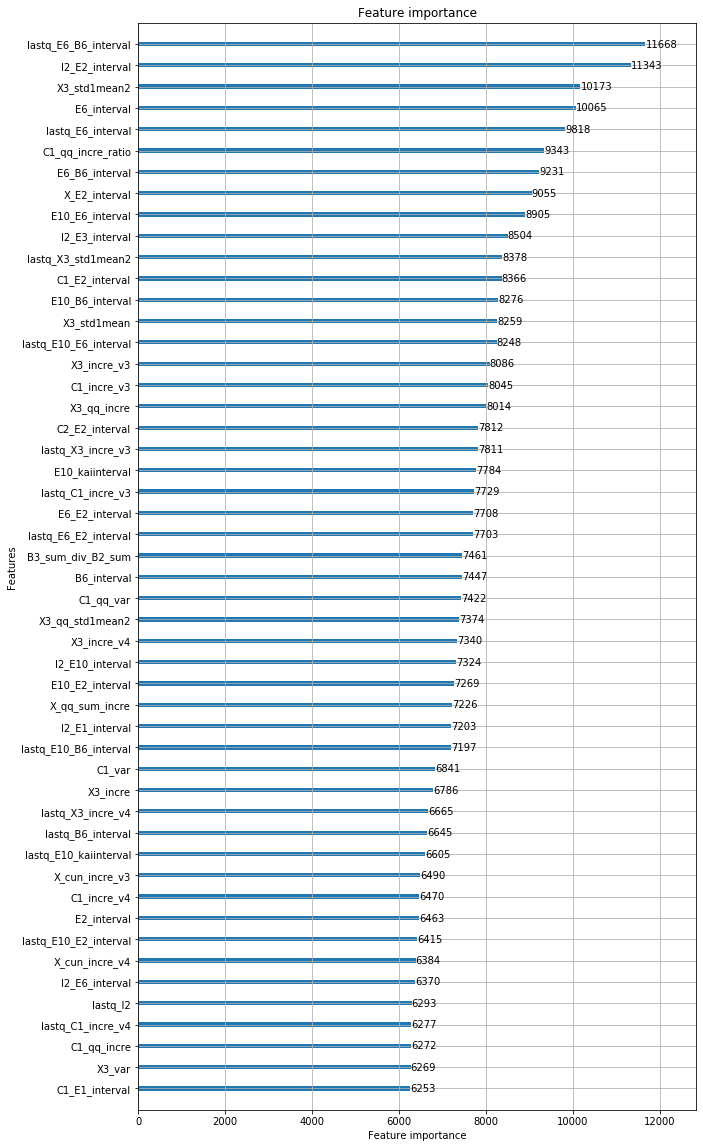

[['X_qq_sum_incre' 39866.97857621312 7226]
 ['X_sum' 18528.36027342081 4410]
 ['C1_qq_incre' 14682.517802417278 6272]
 ...
 ['E9_day' 1.0145519971847534 2]
 ['lastq_E7_E5_interval' 0.8501909971237183 1]
 ['E9_E2_interval' 0.42687100172042847 1]]


In [33]:
category_list = ['I1','I3','I5','I8','I10','I13','I14','lastq_I1','lastq_I3','lastq_I5','lastq_I8','lastq_I10','lastq_I13','lastq_I14']  # 'lastq_I13',
# train_df3.loc[:,category_list] = train_df3.loc[:,category_list].fillna('-1')
# data_train(train_df3, category_list, 'cgb')
# df2 0.4885031208035543,  df3 0.48464523617323363  df 0.4857794193101631
# train_df2 = pd.read_pickle('./data/raw_features_fill2_v1_15W.pkl')
model2,feature_importance2 = data_train(train_df2, category_list, 'lgb')

## featuretoos 50

1.特征重要性高的细加工  + 加入综合特征；  ok 

2.部分特征缺失值修复  ok

3.featurretools top150  split  gain 各生成50；ok

['E10_E2_interval', 'X3_incre_v4', 'lastq_E10_B6_interval', 'C2_E2_interval', 'lastq_E10_E6_interval', 'E10_kaiinterval', 'E10_B6_interval', 'X3_qq_std1mean', 'E10_E6_interval', 'I2_E2_interval', 'B1_qq_incre', 'E6_E2_interval', 'lastq_E10_kaiinterval', 'E6_interval', 'C1_var', 'X3_std1mean2', 'lastq_E6_E2_interval', 'lastq_X3_incre_v3', 'X3_qq_std1mean2', 'lastq_I2', 'lastq_X3_incre_v4', 'E6_B6_interval', 'X3_qq_incre', 'X_E2_interval', 'X3_incre_v3', 'C1_qq_var', 'C1_X_qq_sum_ratio2', 'X_qq_sum_incre', 'I2_E10_interval', 'X3_incre', 'B6_interval', 'B7_amt_ratio', 'lastq_C1_incre_v3', 'lastq_C1_incre_v4', 'B7', 'lastq_B7_amt_ratio', 'C1_qq_incre', 'B3_sum_div_B2_sum', 'X3_std1mean', 'lastq_E6_B6_interval', 'C1_E2_interval', 'C1_qq_incre_ratio']
Built 2625 features
Elapsed: 00:00 | Progress:   0%|                                                                                       

D:\ProgramData\Anaconda3\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:457: RuntimeWarning: divide by zero encountered in true_divide
  values = feature_func(*variable_data)
D:\ProgramData\Anaconda3\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:457: RuntimeWarning: invalid value encountered in true_divide
  values = feature_func(*variable_data)
D:\ProgramData\Anaconda3\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:457: RuntimeWarning: invalid value encountered in multiply
  values = feature_func(*variable_data)


Elapsed: 10:22 | Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████
ft shape (152892, 2625)
[LightGBM] [Warning] feature_fraction is set=0.7457350847503881, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7457350847503881
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] lambda_l1 is set=0.7905165383698197, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7905165383698197
[LightGBM] [Warning] bagging_fraction is set=0.7508393208895859, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7508393208895859
[LightGBM] [Warning] lambda_l2 is set=0.7836020789275822, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7836020789275822
------------------------------ train
{'accuracy_score': 0.9878341239694015, 'f1_score_macro': 0.9856324508860683, 'precision': 0.9792451014433169, 'recall': 0.992315098

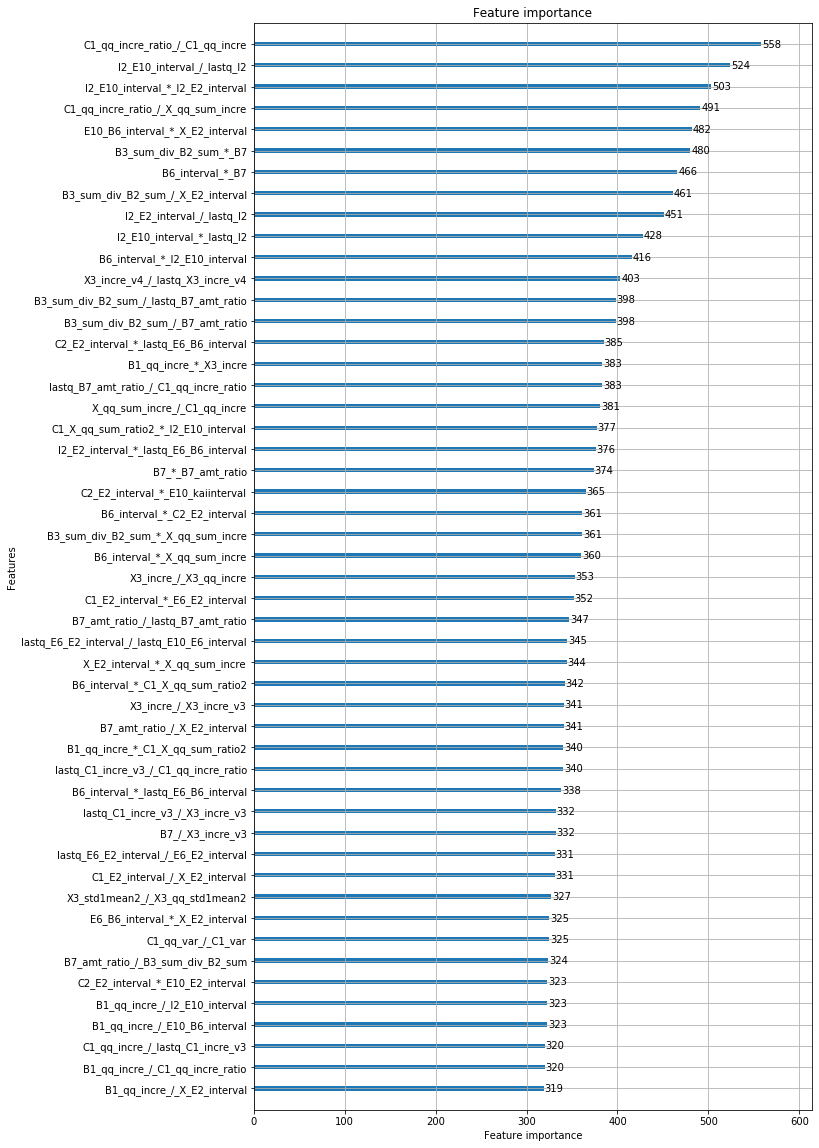

                                     feature          gain  split
1249        X_qq_sum_incre_/_I2_E10_interval  14239.338412    296
1629               lastq_I2_/_X_qq_sum_incre   7827.454772    213
234          C1_E2_interval_/_X_qq_sum_incre   7541.359996    140
2340        I2_E10_interval_*_X_qq_sum_incre   6482.201201    306
310                C1_qq_incre_/_X3_qq_incre   6375.518536    231
2007            C1_qq_incre_*_X_qq_sum_incre   5439.541835    296
1236     X_qq_sum_incre_/_C1_X_qq_sum_ratio2   4171.933356    194
275      C1_X_qq_sum_ratio2_/_X_qq_sum_incre   3786.953673    133
439                  C1_var_/_X_qq_sum_incre   2552.497235    152
808         I2_E10_interval_/_X_qq_sum_incre   2342.428005    181
357       C1_qq_incre_ratio_/_X_qq_sum_incre   2330.232060    491
1923        C1_E2_interval_*_E10_B6_interval   2078.267580    167
479           C2_E2_interval_/_X_E2_interval   1823.644803    293
2119        C2_E2_interval_*_E10_E2_interval   1807.401230    323
1233      

D:\ProgramData\Anaconda3\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:457: RuntimeWarning: invalid value encountered in multiply
  values = feature_func(*variable_data)


Elapsed: 00:00 | Progress:   2%|█▍                                                                                     

D:\ProgramData\Anaconda3\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:457: RuntimeWarning: divide by zero encountered in true_divide
  values = feature_func(*variable_data)
D:\ProgramData\Anaconda3\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:457: RuntimeWarning: invalid value encountered in true_divide
  values = feature_func(*variable_data)


Elapsed: 01:14 | Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████
ft shape (152892, 2262)
[LightGBM] [Warning] feature_fraction is set=0.7457350847503881, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7457350847503881
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] lambda_l1 is set=0.7905165383698197, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7905165383698197
[LightGBM] [Warning] bagging_fraction is set=0.7508393208895859, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7508393208895859
[LightGBM] [Warning] lambda_l2 is set=0.7836020789275822, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7836020789275822
------------------------------ train
{'accuracy_score': 0.9851383758993121, 'f1_score_macro': 0.9825616212128234, 'precision': 0.9749833970554013, 'recall': 0.990568011

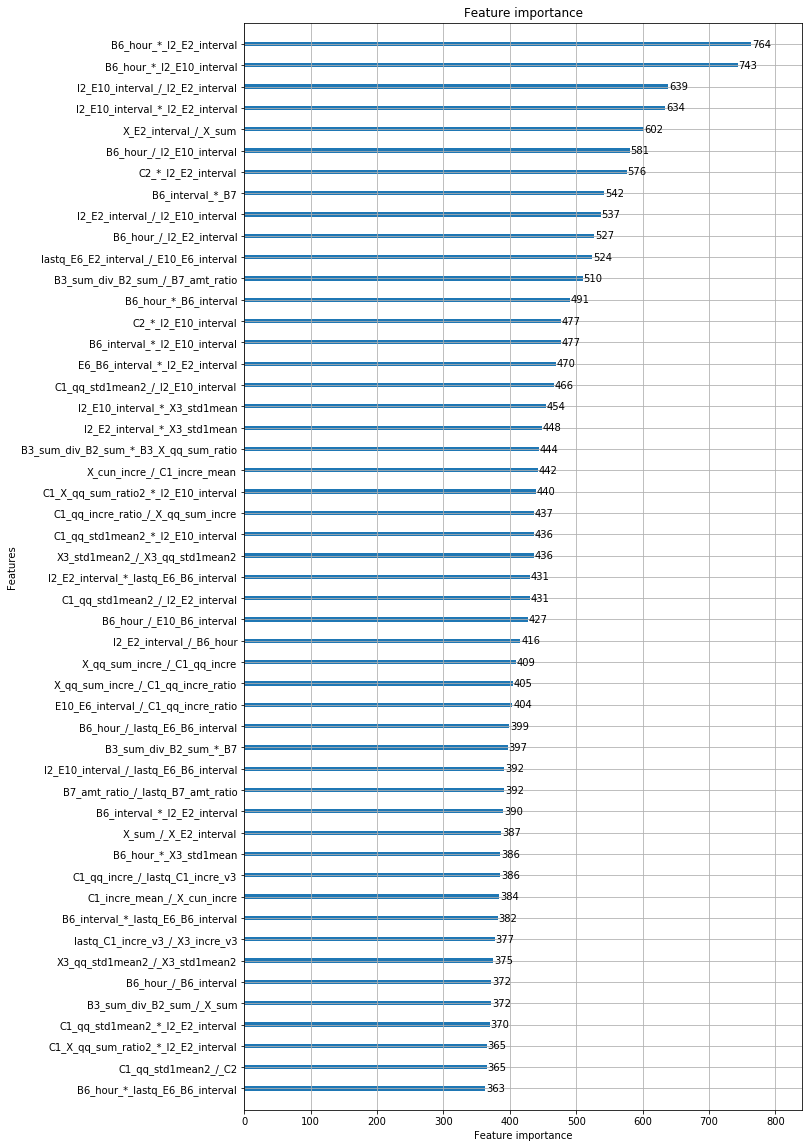

                                     feature          gain  split
1744              C1_X_qq_sum_ratio2_*_X_var  17972.249873    139
1246                  X_var_/_X_qq_sum_incre  14691.334602    114
485         C1_qq_std1mean2_/_X_qq_sum_incre   7190.036708    209
1951                    C2_*_I2_E10_interval   6921.552597    477
1727                 C1_X_qq_sum_ratio2_*_C2   4104.863383    344
599                      C2_/_X_qq_sum_incre   3594.528429    175
480            C1_qq_std1mean2_/_X3_std1mean   2874.805869    325
789         I2_E10_interval_/_X_qq_sum_incre   2507.362170    223
1832            C1_qq_incre_*_X_qq_sum_incre   2381.887018    166
1872                    C1_qq_std1mean2_*_C2   2073.182535    164
308                            C1_incre_/_B7   1853.726626    212
1743              C1_X_qq_sum_ratio2_*_X_sum   1812.038473    228
447       C1_qq_incre_ratio_/_X_qq_sum_incre   1800.369266    437
1952                     C2_*_I2_E2_interval   1694.537947    576
1224      

D:\ProgramData\Anaconda3\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:457: RuntimeWarning: invalid value encountered in true_divide
  values = feature_func(*variable_data)
D:\ProgramData\Anaconda3\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:457: RuntimeWarning: divide by zero encountered in true_divide
  values = feature_func(*variable_data)
D:\ProgramData\Anaconda3\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:457: RuntimeWarning: invalid value encountered in multiply
  values = feature_func(*variable_data)


Elapsed: 1:36:50 | Progress: 100%|█████████████████████████████████████████████████████████████████████████████████████
ft shape (152892, 3577)
[LightGBM] [Warning] feature_fraction is set=0.7457350847503881, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7457350847503881
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] lambda_l1 is set=0.7905165383698197, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7905165383698197
[LightGBM] [Warning] bagging_fraction is set=0.7508393208895859, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7508393208895859
[LightGBM] [Warning] lambda_l2 is set=0.7836020789275822, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7836020789275822
------------------------------ train
{'accuracy_score': 0.9843856670225988, 'f1_score_macro': 0.9815527716801015, 'precision': 0.9738284268439017, 'recall': 0.989711831

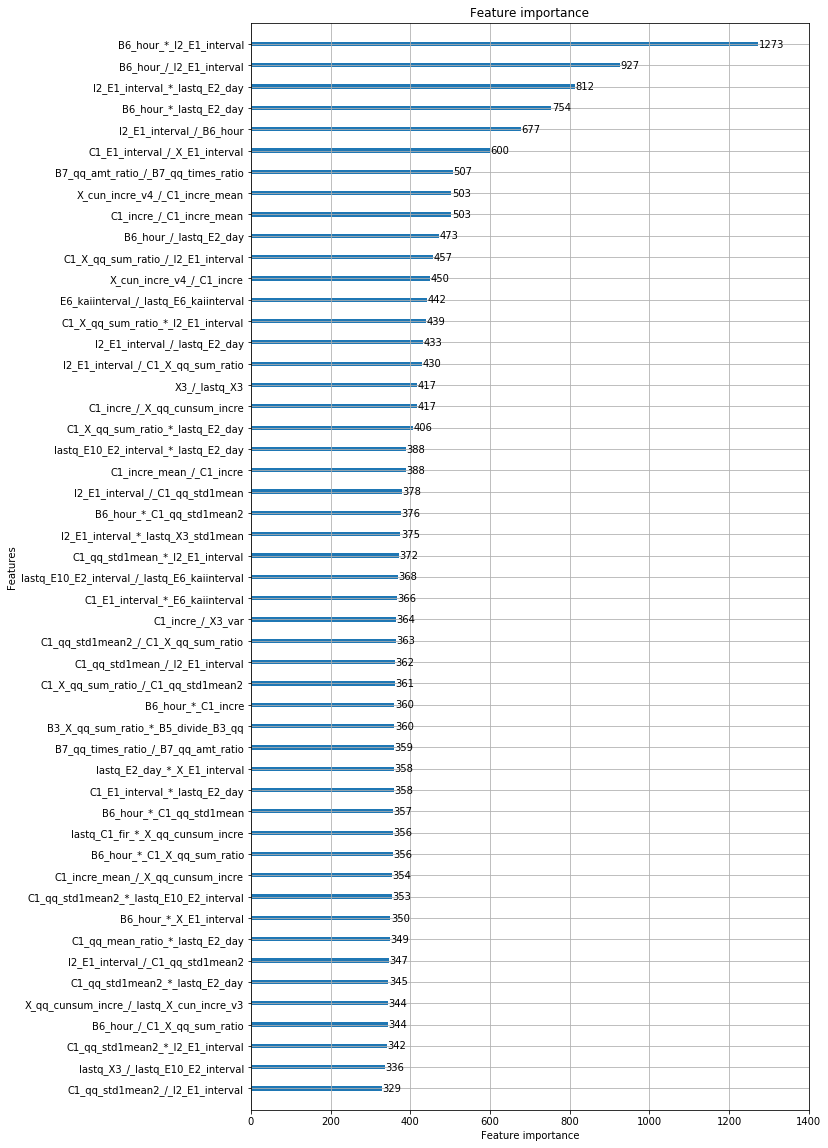

                                           feature          gain  split
442                      C1_E1_interval_/_C1_incre  18802.047763    321
438                       C1_E1_interval_/_B6_hour   7401.112767    240
734               C1_qq_std1mean2_/_C1_qq_std1mean   7263.671448    299
296                       B6_hour_/_C1_E1_interval   6481.194195    317
462                 C1_E1_interval_/_X_E1_interval   6280.064924    600
752            C1_qq_std1mean2_/_X_qq_cunsum_incre   4365.577408    129
1401                           X3_/_C1_E1_interval   3316.120058    298
1307                     I2_E1_interval_/_C1_incre   2475.151687    291
2842                  C1_incre_*_X_qq_cunsum_incre   2459.571854    205
508                         C1_X_qq_sum_ratio_/_X3   2384.316436    151
2645                      B6_hour_*_I2_E1_interval   2343.231079   1273
83                    B3_X_qq_sum_ratio_/_lastq_B7   2169.645216    242
686               C1_qq_std1mean_/_C1_qq_std1mean2   1940.932194

D:\ProgramData\Anaconda3\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:457: RuntimeWarning: invalid value encountered in true_divide
  values = feature_func(*variable_data)
D:\ProgramData\Anaconda3\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:457: RuntimeWarning: divide by zero encountered in true_divide
  values = feature_func(*variable_data)
D:\ProgramData\Anaconda3\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:457: RuntimeWarning: invalid value encountered in multiply
  values = feature_func(*variable_data)


Elapsed: 59:42 | Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████
ft shape (152892, 3578)
[LightGBM] [Warning] feature_fraction is set=0.7457350847503881, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7457350847503881
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] lambda_l1 is set=0.7905165383698197, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7905165383698197
[LightGBM] [Warning] bagging_fraction is set=0.7508393208895859, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7508393208895859
[LightGBM] [Warning] lambda_l2 is set=0.7836020789275822, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7836020789275822
------------------------------ train
{'accuracy_score': 0.9851908904721061, 'f1_score_macro': 0.98259618098318, 'precision': 0.975035536040603, 'recall': 0.990581616090

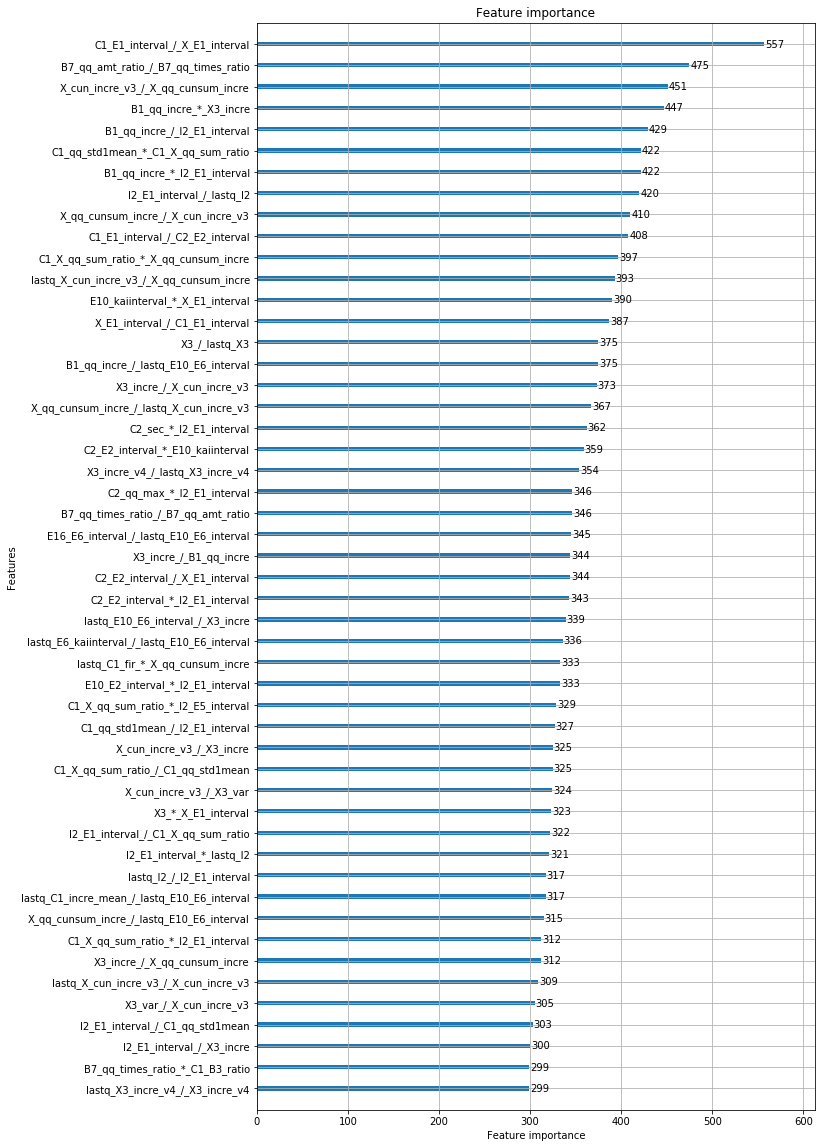

                                       feature          gain  split
396            C1_E1_interval_/_C2_E2_interval  12873.030108    408
417         C1_E1_interval_/_X_qq_cunsum_incre  11776.845569    188
415             C1_E1_interval_/_X_E1_interval   4129.949085    557
554                             C1_qq_min_/_X3   3622.135184     69
2942                C2_qq_max_*_I2_E1_interval   3109.983520    346
609         C1_qq_std1mean_/_X_qq_cunsum_incre   2993.234855    124
1643             X_qq_cunsum_incre_/_C1_qq_min   2808.552489    105
2769     C1_X_qq_sum_ratio_*_X_qq_cunsum_incre   2698.377962    397
1544            X_E1_interval_/_C1_E1_interval   2675.263236    387
2692              C1_B3_ratio_*_X_cun_incre_v3   2572.410396    237
1714              lastq_B7_/_X_qq_cunsum_incre   2526.730347    270
561              C1_qq_min_/_X_qq_cunsum_incre   2070.216365    104
445              C1_X_qq_sum_ratio_/_C2_qq_max   1831.702499    121
443         C1_X_qq_sum_ratio_/_C1_qq_std1mean  

D:\ProgramData\Anaconda3\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:457: RuntimeWarning: divide by zero encountered in true_divide
  values = feature_func(*variable_data)
D:\ProgramData\Anaconda3\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:457: RuntimeWarning: invalid value encountered in true_divide
  values = feature_func(*variable_data)


Elapsed: 00:00 | Progress:   2%|█▍                                                                                     

D:\ProgramData\Anaconda3\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:457: RuntimeWarning: invalid value encountered in multiply
  values = feature_func(*variable_data)


Elapsed: 00:20 | Progress:  95%|██████████████████████████████████████████████████████████████████████████████████▋    [LightGBM] [Warning] feature_fraction is set=0.7457350847503881, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7457350847503881
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] lambda_l1 is set=0.7905165383698197, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7905165383698197
[LightGBM] [Warning] bagging_fraction is set=0.7508393208895859, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7508393208895859
[LightGBM] [Warning] lambda_l2 is set=0.7836020789275822, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7836020789275822
------------------------------ train
{'accuracy_score': 0.9836504630034835, 'f1_score_macro': 0.9806756110406254, 'precision': 0.9725470581350425, 'recall': 0.9892950384037517, 'kappa': 0.96879

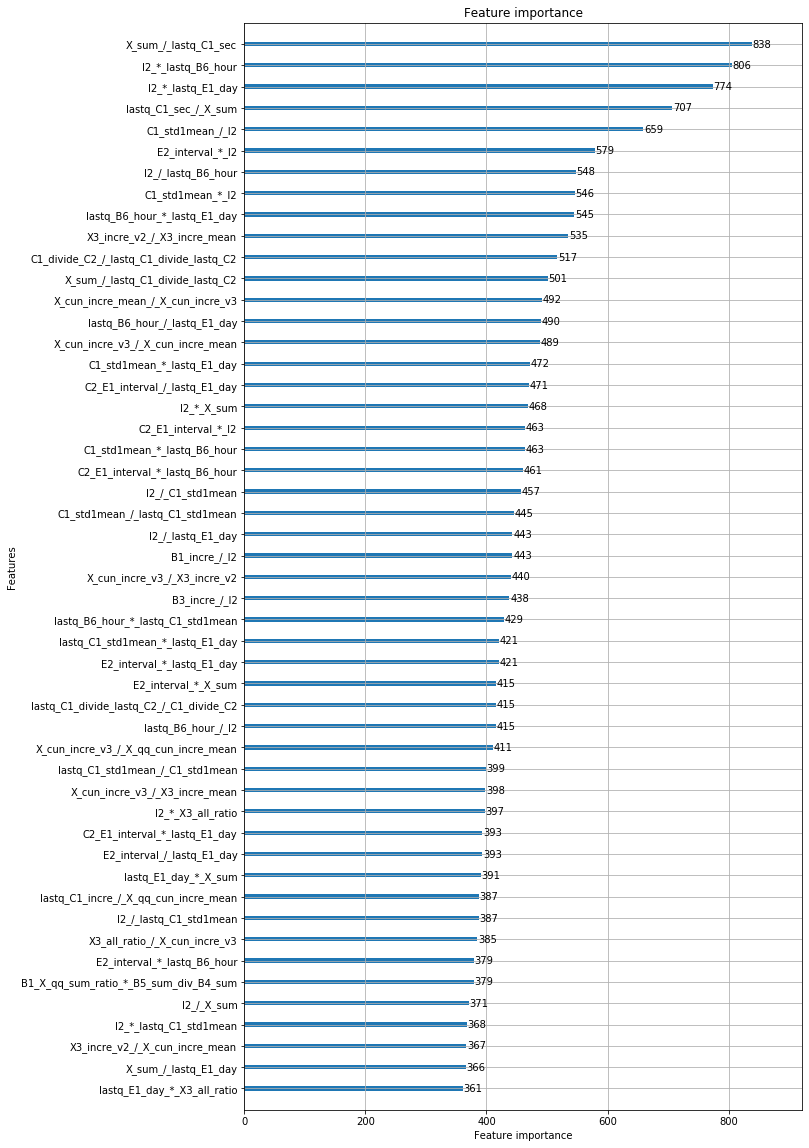

                                          feature          gain  split
910                                    I2_/_X_sum  17662.698551    371
368               C1_divide_C2_/_X_cun_incre_mean   7326.566792    120
369                 C1_divide_C2_/_X_cun_incre_v3   6303.674301    183
1439                                   X_sum_/_I2   6216.154050    338
1457                         X_sum_/_lastq_C1_sec   5427.775714    838
2861                 C2_E1_interval_*_E2_interval   5122.563477    275
1597                        lastq_B6_hour_/_X_sum   4981.678100    228
1464                         X_sum_/_lastq_E1_day   3683.410186    366
907                         I2_/_X_cun_incre_mean   3550.047482    154
1183                       X3_mean_/_C1_divide_C2   3412.718195    156
1842                         lastq_C1_sec_/_X_sum   3412.511502    707
2748               C1_B3_ratio_*_X_cun_incre_mean   3149.850432    305
3189                                   I2_*_X_sum   3030.983874    468
366   

D:\ProgramData\Anaconda3\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:457: RuntimeWarning: divide by zero encountered in true_divide
  values = feature_func(*variable_data)
D:\ProgramData\Anaconda3\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:457: RuntimeWarning: invalid value encountered in true_divide
  values = feature_func(*variable_data)


Elapsed: 00:00 | Progress:   2%|█▍                                                                                     

D:\ProgramData\Anaconda3\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:457: RuntimeWarning: invalid value encountered in multiply
  values = feature_func(*variable_data)


Elapsed: 00:20 | Progress:  95%|██████████████████████████████████████████████████████████████████████████████████▋    ------------------------------ train
{'accuracy_score': 0.9838605212946593, 'f1_score_macro': 0.9808905265169067, 'precision': 0.9729711990756528, 'recall': 0.9892687298753997, 'kappa': 0.9691783776392531}
------------------------------ test
{'accuracy_score': 0.7193719476973166, 'f1_score_macro': 0.6308149210363193, 'precision': 0.6286888889268966, 'recall': 0.6330308196973209, 'kappa': 0.456029385056977}


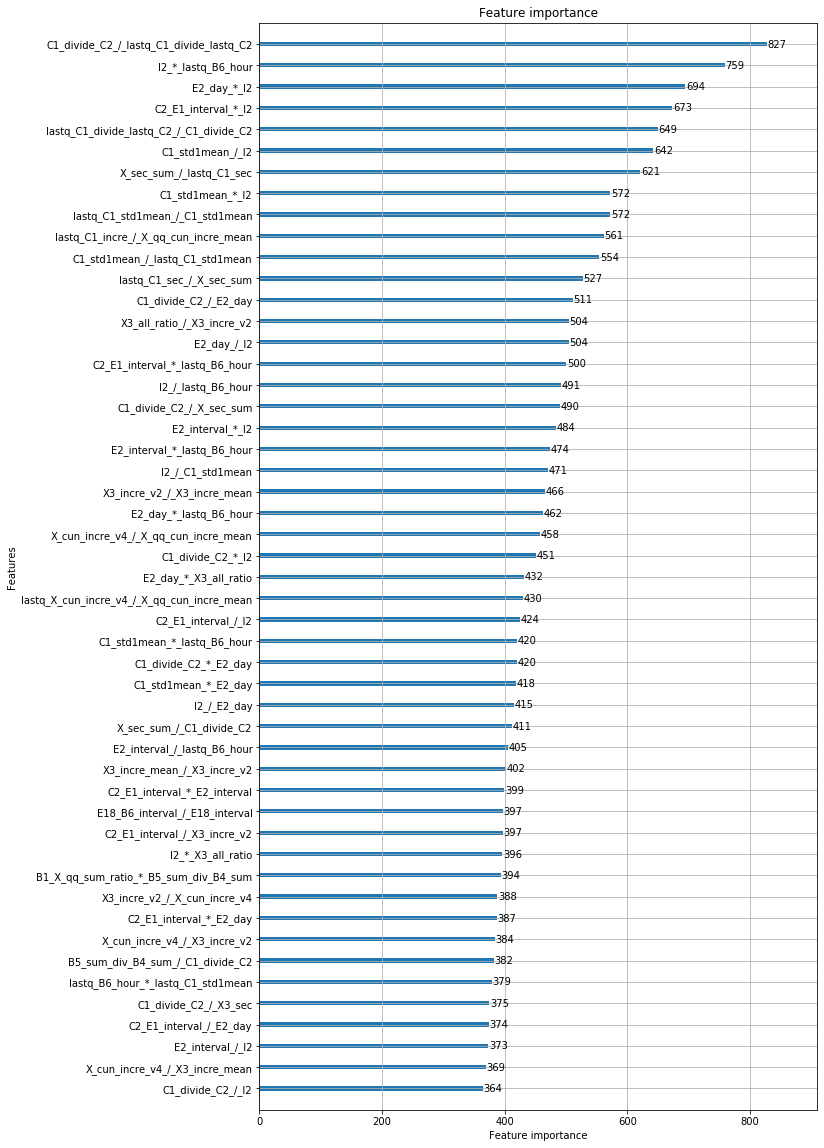

                                         feature          gain  split
2698                           C1_divide_C2_*_I2  17565.780161    451
2781                C2_E1_interval_*_E2_interval   9801.019677    399
280      C1_divide_C2_/_lastq_C1_divide_lastq_C2   7267.828823    827
271           C1_divide_C2_/_X_qq_cun_incre_mean   6149.885160    201
2686               C1_divide_C2_*_C2_E1_interval   5332.140213    351
1769     lastq_C1_divide_lastq_C2_/_C1_divide_C2   5005.954042    649
1405                   X_sec_sum_/_lastq_B6_hour   4772.190293    192
334              C1_std1mean_/_lastq_C1_std1mean   2903.778510    554
1407        X_sec_sum_/_lastq_C1_divide_lastq_C2   2323.622059    250
2015             lastq_C1_std1mean_/_C1_std1mean   2165.808278    572
1938        lastq_C1_incre_/_X_qq_cun_incre_mean   2012.188872    561
1411                    X_sec_sum_/_lastq_C1_sec   1901.687793    621
1052                  X3_all_ratio_/_X3_incre_v2   1810.345355    504
1988                

In [16]:

# 特征重要性df top 30   150
for i in [0,50,100]:
    for imp in ['split','gain']:

        rmlist = set(['lastq_I8','I8'])
        top_list = set(feature_importance.sort_values(imp, ascending=False)[i:i+50].sort_values('feature',ascending=True).feature.values)
        top_list = list(top_list - rmlist)
        print(top_list)
        top_list.append('cust_q')
        top20_df = train_df[top_list]
        top20_df.head()

        import gc
        gc.enable()
        gc.collect()
        import featuretools as ft


        es = ft.EntitySet(id='dfs')
        es.entity_from_dataframe(entity_id='top20_df',         # 增加一个数据框
                     dataframe=top20_df,
                     index='cust_q')

        # es.entity_from_dataframe(entity_id='df_in',         # 增加一个数据框
        #              dataframe=df_in,
        #              index='id',
        #              make_index=True)
        # # 通过 id 关联 df_1 和 df_2 实体
        # relation1 = ft.Relationship(es['df_info']['corpid'], es['df_in']['corpid'])
        # es = es.add_relationship(relation1)
        # ft.list_primitives()[ft.list_primitives().type=='transform']

        ## 运行特征衍生
        features_matrix,feature_names = ft.dfs(entityset=es,
                                                 target_entity='top20_df',
                                                 trans_primitives=["divide_numeric",'multiply_numeric'],
                                                 max_depth=2,n_jobs=1,verbose=-1)

        print('ft shape',features_matrix.shape)


        top_list.remove('cust_q')
        features_matrix = features_matrix.drop(top_list, axis=1)
        features_matrix = train_df[['label','cust_q','cust_no']].merge(features_matrix, how='left', left_on='cust_q', right_index=True)

        # 重要性筛选
        model,feature_importance2 = data_train(features_matrix, category_list, 'lgb')
        top_list = list(feature_importance2.sort_values(imp, ascending=False)[0:50].sort_values('feature',ascending=True).feature.values)
        top_list2 = []
        for tt in top_list:
            top_list2.append(tt.replace('_*_',' * ').replace('_/_',' / '))
        top_list2.append('cust_q')
        train_df = train_df.merge(features_matrix[top_list2], how='left', left_on='cust_q', right_on='cust_q')
        del es,features_matrix
    
            
train_df.to_pickle('./data/raw_merge_top100featuretools50_v1.pkl')



In [17]:

print(train_df.shape)
train_df.head()


(152892, 1379)


,cust_no,lastq_valid,lastq_I1,lastq_I2,lastq_I3,lastq_I4,lastq_I5,lastq_I6,lastq_I7,lastq_I8,...,X_tou_incre / C1_divide_C2,lastq_B6_hour * X_sec_sum,lastq_C1_divide_lastq_C2 / C1_divide_C2_y,lastq_C1_incre / X_qq_cun_incre_mean_y,lastq_C1_sec * lastq_C1_std1mean,lastq_C1_sec / X_qq_cun_incre_mean,lastq_C1_sec / X_sec_sum,lastq_C1_std1mean / C1_std1mean_y,lastq_X3_std1mean / X3_incre_mean,lastq_X_cun_incre_v4 / X_qq_cun_incre_mean
0,0x3b9acb2b,1.0,男性,42.0,普通客户,0.0,NaN,1.0,0.0,天蝎座,...,NaN,22549540.4,0.920045,1.194786,3.347012e+04,-1.542867e+04,0.004037,0.993647,-3.302568e+01,0.711860
1,0x3b9acc6c,1.0,女性,37.0,普通客户,0.0,NaN,1.0,0.0,天秤座,...,NaN,NaN,0.999041,1.339172,8.736139e+03,2.546472e+06,0.999032,0.999865,1.482136e+04,0.000000
2,0x3b9acc87,1.0,女性,68.0,黄金,0.0,不便分类的其他从业人员,0.0,0.0,双子座,...,0.0,NaN,985.996056,0.000000,1.151412e+06,6.169410e+06,0.908358,2.745909,1.198929e+02,0.000802
3,0x3b9acca4,1.0,女性,69.0,普通客户,0.0,服务性工作人员,0.0,0.0,处女座,...,NaN,NaN,0.999658,0.792908,3.368487e+05,1.116933e+08,0.973718,0.999967,1.069274e+06,3.022615
4,0x3b9accb7,1.0,女性,49.0,普通客户,0.0,NaN,1.0,0.0,双子座,...,NaN,NaN,0.999041,1.340197,3.458640e+04,8.598396e+06,0.999030,0.999885,1.735337e+04,0.000000


In [19]:
feature_importance2.head()

,feature,gain,split
2698,C1_divide_C2_*_I2,17565.780161,451
2781,C2_E1_interval_*_E2_interval,9801.019677,399
280,C1_divide_C2_/_lastq_C1_divide_lastq_C2,7267.828823,827
271,C1_divide_C2_/_X_qq_cun_incre_mean,6149.885160,201
2686,C1_divide_C2_*_C2_E1_interval,5332.140213,351


## 特征选择

In [27]:
def drop_feature(train_df):

    drop_list = []
#     # 行缺失率  无：max0.6
#     train_df.isnull().sum(axis=1).sort_values(ascending=False) / train_df.shape[1]

    # 特征缺失率 0.98
    miss_features = train_df.isnull().sum().sort_values(ascending=False) / train_df.shape[0]
    print('******************miss',miss_features.head(20))
    # upadate drop list
    miss_list = miss_features[miss_features >= 0.98].index.values
    print('miss_list drop',miss_list)
    drop_list.extend(miss_list)

    # 方差 0.001
    var_features = train_df.fillna(0).var().sort_values()
    print('********************var',var_features[0:20])
    var_drop = var_features[var_features <= 0.001].index.values
    print(var_drop)
    drop_list.extend(var_drop)    

#     # 特征单值率 0.98
#     sigle_rate = {}
#     for var in train_df.columns:
#         sigle_rate[var]=(train_df[var].value_counts().max()/train_df.shape[0])
#     print('******************single',sorted(sigle_rate.items(),key=lambda x:x[1], reverse=True)[0:50])
#     # upadate drop list  sigle
#     single_drop = [key for key, value in sigle_rate.items() if value >= 0.98]
#     print('single drop',single_drop)
#     drop_list.extend(single_drop)

#     #相关系数 0.98
#     corr_df=train_df.corr()
#     upper = corr_df.where(np.triu(np.ones(corr_df.shape), k=1).astype(np.bool))
#     corr_drop = [column for column in upper.columns if any(upper[column].abs()>0.98)]
#     print('******************corr_drop',corr_drop)
#     drop_list.extend(corr_drop)


    
    return list(set(drop_list))

drop_list  =  drop_feature(train_df)
sorted(drop_list)



# drop list 微调
white_list = ['B2_sum','B35_amt','B6_qq_hour','B6_qq_interval', 'C1_mean', 'C2','X2','C1_qq_mean','X_cun_incre','X_qq_cun_incre']

drop_list2 = ['lastq_valid', 'valid','B6_lastdate','B6','E1','E2',
              'E3','E4','E5','E6','E7','E8','E9','E10','E11','E12',
              'E13','E14','E16','E18','lastq_B6_lastdate','lastq_B6',
              'lastq_E1','lastq_E2','lastq_E3','lastq_E4','lastq_E5',
              'lastq_E6','lastq_E7','lastq_E8','lastq_E9','lastq_E10',
              'lastq_E11','lastq_E12','lastq_E13','lastq_E14',
              'lastq_E16','lastq_E18','lastq_cust_q']

drop_list.extend(drop_list2)

drop_list = list(set(drop_list)-set(white_list))
print(len(drop_list))
sorted(drop_list)

# # 删除 drop list 特征 保存衍后特征

train_df3 = train_df.drop(drop_list,axis=1)
print(train_df3.shape)
train_df3.to_pickle('./data/feature_select_fill2_v1_15W.pkl')

******************miss E11_dayofweek             1.0
lastq_E11_E5_interval     1.0
lastq_E11_E6_interval     1.0
B6_qq_hour                1.0
E11                       1.0
E11_E7_interval           1.0
lastq_E11_E7_interval     1.0
E11_E8_interval           1.0
lastq_E11_E8_interval     1.0
E11_E9_interval           1.0
lastq_E11_E9_interval     1.0
E11_E10_interval          1.0
lastq_E11_E10_interval    1.0
E12_E11_interval          1.0
E13_E11_interval          1.0
E14_E11_interval          1.0
E16_E11_interval          1.0
E18_E11_interval          1.0
lastq_E12_E11_interval    1.0
lastq_E13_E11_interval    1.0
dtype: float64
miss_list drop ['E11_dayofweek' 'lastq_E11_E5_interval' 'lastq_E11_E6_interval'
 'B6_qq_hour' 'E11' 'E11_E7_interval' 'lastq_E11_E7_interval'
 'E11_E8_interval' 'lastq_E11_E8_interval' 'E11_E9_interval'
 'lastq_E11_E9_interval' 'E11_E10_interval' 'lastq_E11_E10_interval'
 'E12_E11_interval' 'E13_E11_interval' 'E14_E11_interval'
 'E16_E11_interval' 'E18_E11_int

['B6_qq_hour',
 'B6_qq_interval',
 'C2_E1_interval / lastq_E1_day',
 'E10_E9_interval',
 'E11',
 'E11_B6_interval',
 'E11_E10_interval',
 'E11_E2_interval',
 'E11_E3_interval',
 'E11_E4_interval',
 'E11_E5_interval',
 'E11_E6_interval',
 'E11_E7_interval',
 'E11_E8_interval',
 'E11_E9_interval',
 'E11_day',
 'E11_dayofweek',
 'E11_interval',
 'E11_is_month_end',
 'E11_kaiinterval',
 'E12_E11_interval',
 'E12_E7_interval',
 'E12_E8_interval',
 'E12_E9_interval',
 'E13_E11_interval',
 'E13_E7_interval',
 'E13_E8_interval',
 'E13_E9_interval',
 'E14_E11_interval',
 'E14_E7_interval',
 'E14_E9_interval',
 'E16_E11_interval',
 'E16_E7_interval',
 'E16_E9_interval',
 'E18_E11_interval',
 'E18_E7_interval',
 'E18_E9_interval',
 'E3_E2_interval',
 'E7_E4_interval',
 'E7_E5_interval',
 'E7_is_month_end',
 'E8E9_interval',
 'E8_E7_interval',
 'E9',
 'E9_B6_interval',
 'E9_E2_interval',
 'E9_E3_interval',
 'E9_E4_interval',
 'E9_E5_interval',
 'E9_E6_interval',
 'E9_E7_interval',
 'E9_E8_interval

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.21860855317755723, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21860855317755723
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] lambda_l1 is set=0.25916787591548507, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.25916787591548507
[LightGBM] [Warning] bagging_fraction is set=0.3520071162862265, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3520071162862265
[LightGBM] [Warning] lambda_l2 is set=0.07013352667143534, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07013352667143534
------------------------------ train
{'accuracy_score': 0.993362799585722, 'f1_score_macro': 0.992166421369097, 'precision': 0.9879393836318539, 'recall': 0.9965203950310925, 'kappa': 0.9872286068

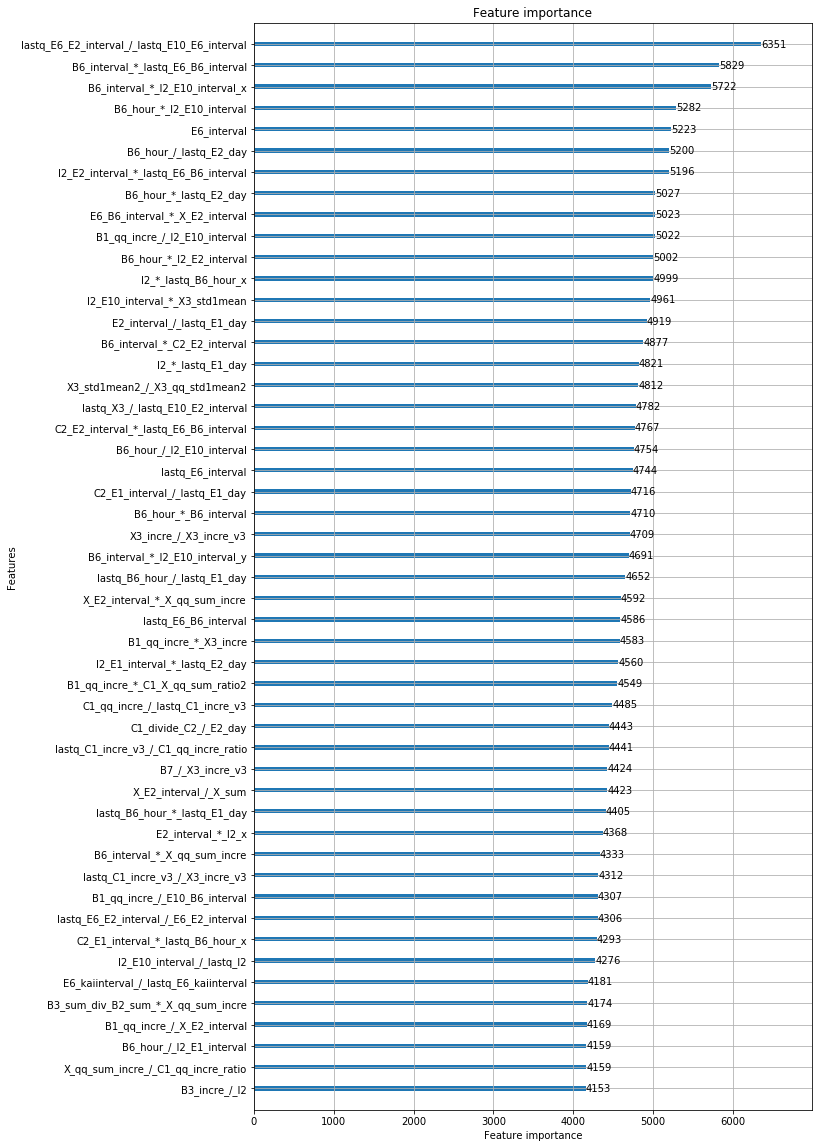

[['X_var_/_X_qq_sum_incre' 17687.417484760284 1818]
 ['C2_/_X_qq_sum_incre' 16552.36220124364 2260]
 ['X_sum' 14562.993188649416 1187]
 ...
 ['E10_E9_interval' 0.5627589821815491 1]
 ['E9_E6_interval' 0.4149110019207001 1]
 ['E9_dayofweek' 0.37559598684310913 1]]


In [26]:
# 模型特征选择
# category_list = ['I1','I3','I5','I8','I10','I13','I14','lastq_I1','lastq_I3','lastq_I5','lastq_I8','lastq_I10','lastq_I13','lastq_I14']  # 'lastq_I13',
# # train_df3.loc[:,category_list] = train_df3.loc[:,category_list].fillna('-1')
# # data_train(train_df3, category_list, 'cgb')
# # df2 0.4885031208035543,  df3 0.48464523617323363  df 0.4857794193101631
# model,feature_importance = data_train(train_df, category_list, 'lgb')

In [2]:
import pandas as pd

train_df = pd.read_pickle('./data/feature_select_fill2_v1_15W.pkl')
print(train_df.shape)
train_df.head(2)

(152892, 1214)


,cust_no,lastq_I1,lastq_I2,lastq_I3,lastq_I4,lastq_I5,lastq_I6,lastq_I8,lastq_I10,lastq_I11,...,X_tou_incre / C1_divide_C2,lastq_B6_hour * X_sec_sum,lastq_C1_divide_lastq_C2 / C1_divide_C2_y,lastq_C1_incre / X_qq_cun_incre_mean_y,lastq_C1_sec * lastq_C1_std1mean,lastq_C1_sec / X_qq_cun_incre_mean,lastq_C1_sec / X_sec_sum,lastq_C1_std1mean / C1_std1mean_y,lastq_X3_std1mean / X3_incre_mean,lastq_X_cun_incre_v4 / X_qq_cun_incre_mean
0,0x3b9acb2b,男性,42.0,普通客户,0.0,NaN,1.0,天蝎座,NaN,0.0,...,NaN,22549540.4,0.920045,1.194786,33470.122224,-1.542867e+04,0.004037,0.993647,-33.025681,0.71186
1,0x3b9acc6c,女性,37.0,普通客户,0.0,NaN,1.0,天秤座,NaN,0.0,...,NaN,NaN,0.999041,1.339172,8736.139078,2.546472e+06,0.999032,0.999865,14821.363855,0.00000


In [3]:
probs_df = pd.read_pickle('./data/basemodel_ft_50w_1208.v1pkl')  

In [5]:
test_df = probs_df.set_index('cust_no')
# probs_df = train_df3.loc[:,[,'cust_no']]
test_df.loc[test_df.label.isnull(),~test_df.columns.str.contains('_prob')].mode(axis=1)

,0,1
cust_no,,
0x3b9acb2b,0.0,NaN
0x3b9acc6c,1.0,NaN
0x3b9acc87,1.0,NaN
0x3b9acca4,1.0,NaN
0x3b9accb7,1.0,NaN
0x3b9accd2,1.0,NaN
0x3b9acd0c,0.0,NaN
0x3b9acd4e,1.0,NaN
0x3b9acd53,1.0,NaN
